### This notebook has been made exclusively to check what events are in a file

In [26]:
import sys,os,os.path
sys.path.append("../../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import IC.invisible_cities.io.dst_io                           as     dstio

import pandas as pd
import numpy  as np
import tables as tb


from next_misc.Tl_studies.functions.beersheba_process import soph_to_lowTh
import matplotlib.pyplot as plt

import IC.invisible_cities.io.mcinfo_io as mcio



In [27]:
def event_range(file_path):
    '''
    Opens a h5 file and tells you the event range within it (not MC events).
    This is for sophronia at the moment, adapt later for more cities
    '''
    
    # collect data
    df = dstio.load_dst(file_path, 'RECO', 'Events')

    # read event numbers
    array = df['event'].to_numpy()
    min_event = min(array)
    max_event = max(array)

    print("Event range: {} - {}".format(min_event, max_event))



In [28]:
file_path = '../../../Tl_studies/LPR/208Tl/PORT_1a/prod/sophronia/sophronia/'
file = 'sophronia_108_208Tl.h5'



event_range(file_path + file)

Event range: 2140000 - 2140606


In [29]:
q=0

# load positron events (if you've created them) THIS ONLY WORKS SINCE WE'RE LOOKING AT THE SAME EVENT
event_ids = np.load(f'z_slice/positron_event_ids.npy')
EVENT = event_ids[q]


file_ = '../sophronia_2us/sophronia_qthr3_2us.h5'
threshold = 3



# load data
# checking the event
hdst = dstio.load_dst(file_, 'RECO', 'Events')

# now take the relevant event only
hdst = (hdst[hdst['event'] == EVENT])

# generate low threshold
hits = soph_to_lowTh(hdst, threshold = threshold, verbose = False)




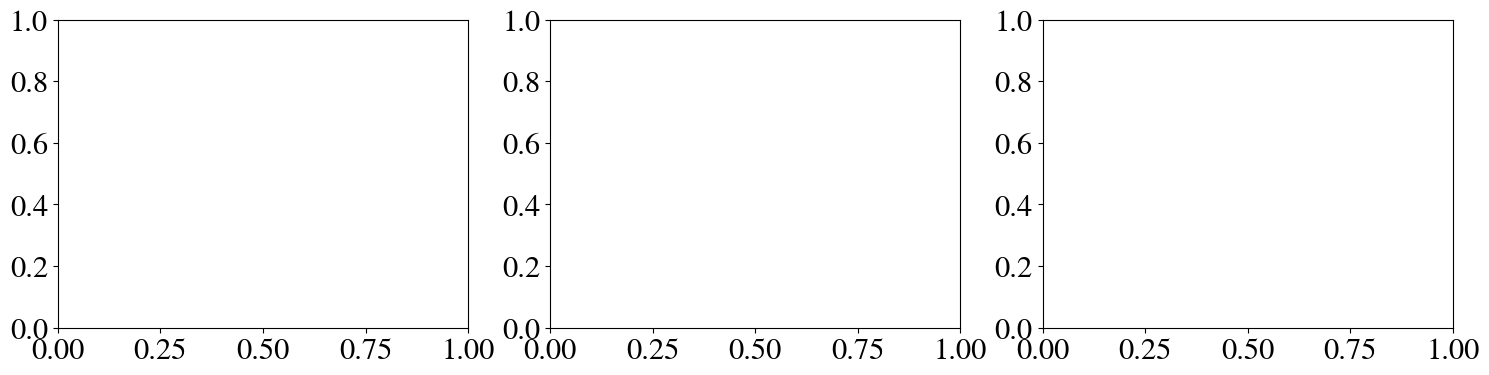

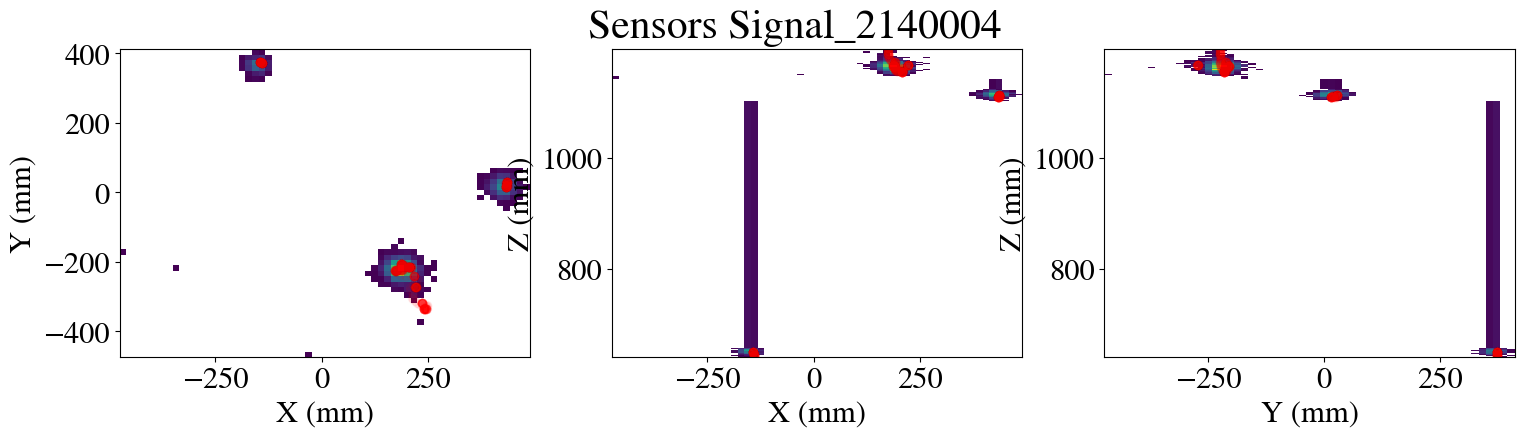

In [32]:
pitch = 15.55
# then applying transformations to convert to 'SiPM outputs'
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

evtmap = mcio.load_eventnumbermap(file_).set_index('nexus_evt')
true_info = mcio.load_mchits_df(file_).reset_index()
true_info.event_id = true_info.event_id.map(evtmap.evt_number)


this_evt_true_info = true_info[true_info.event_id == EVENT]

xt = this_evt_true_info.x
yt = this_evt_true_info.y
zt = this_evt_true_info.z
et = this_evt_true_info.energy*1000

xx = np.arange(hits.X.min(), hits.X.max() + pitch, pitch)
yy = np.arange(hits.Y.min(), hits.Y.max() + pitch, pitch)
zz = hits.Z.unique()



axes[0].hist2d(hits.X, hits.Y, bins=[xx, yy], weights=hits.Q, cmin=0.0001);
axes[0].scatter(xt, yt,  alpha=0.05, color='red')
axes[0].set_xlabel('X (mm)');
axes[0].set_ylabel('Y (mm)');

axes[1].hist2d(hits.X, hits.Z, bins=[xx, zz], weights=hits.Q, cmin=0.0001);
axes[1].scatter(xt, zt,  alpha=0.05, color='red')
axes[1].set_xlabel('X (mm)');
axes[1].set_ylabel('Z (mm)');


axes[2].hist2d(hits.Y, hits.Z, bins=[yy, zz], weights=hits.Q, cmin=0.0001);
axes[2].scatter(yt, zt,  alpha=0.05, color='red')
axes[2].set_xlabel('Y (mm)');
axes[2].set_ylabel('Z (mm)');

fig.suptitle('Sensors Signal_' + str(EVENT), fontsize=30)
plt.show()

Processing: 0


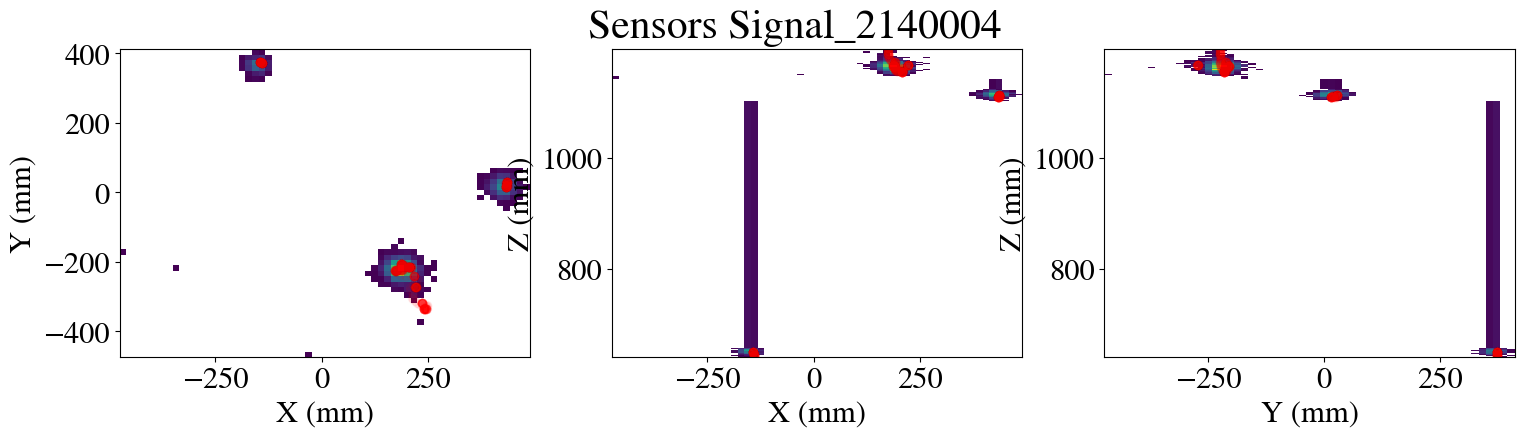

Processing: 1


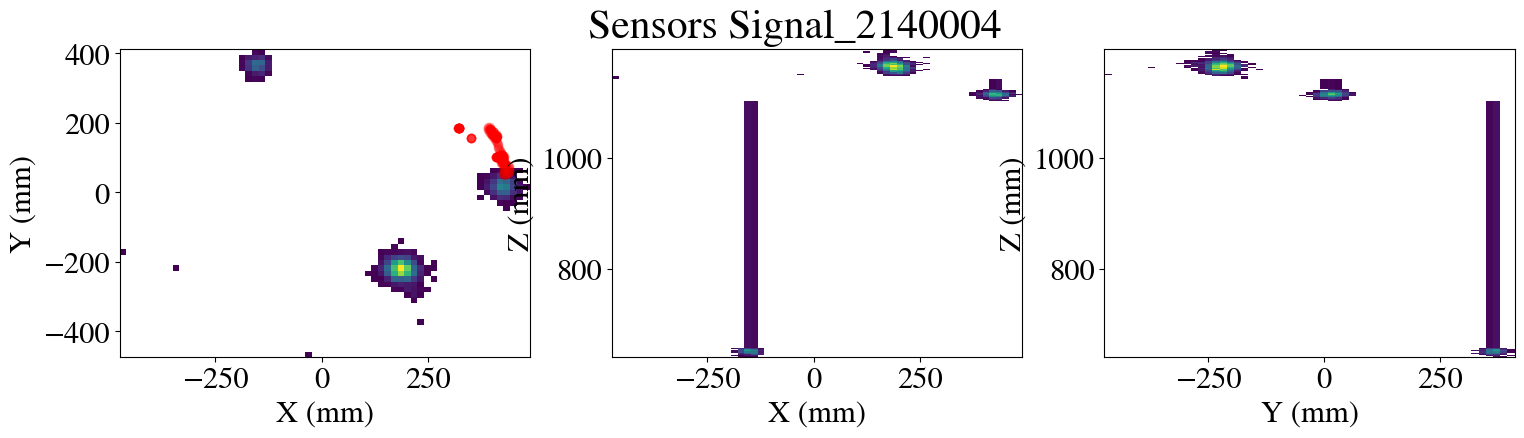

Processing: 2


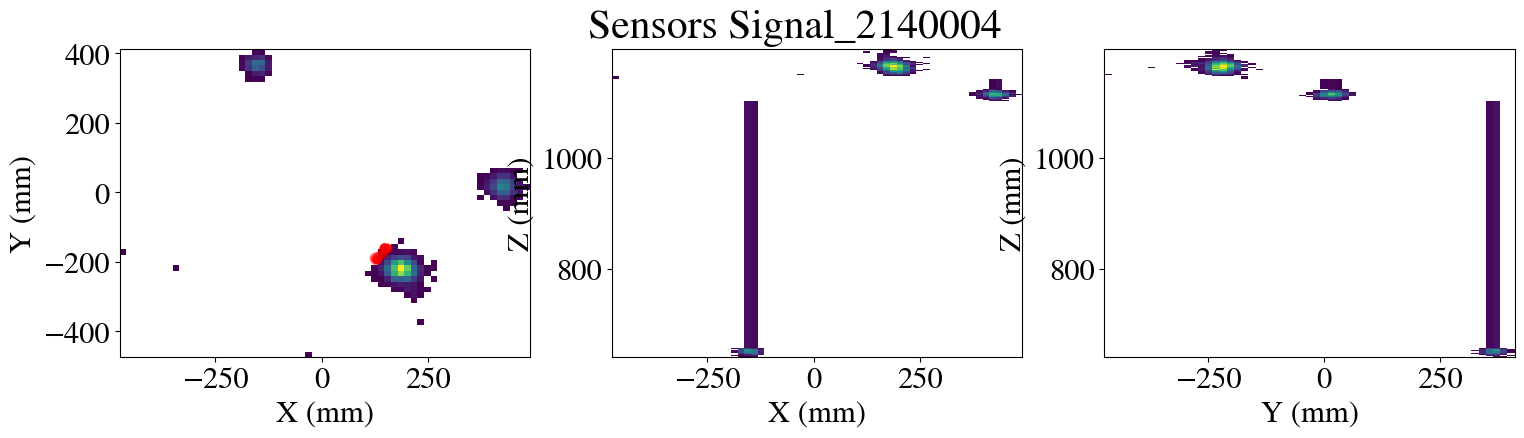

Processing: 3


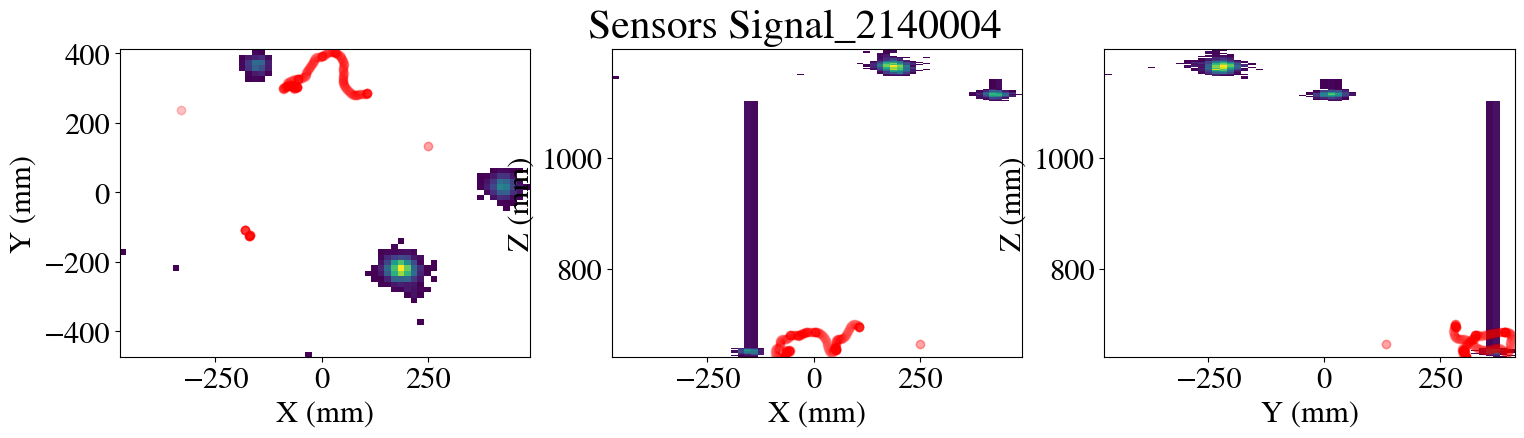

Processing: 4


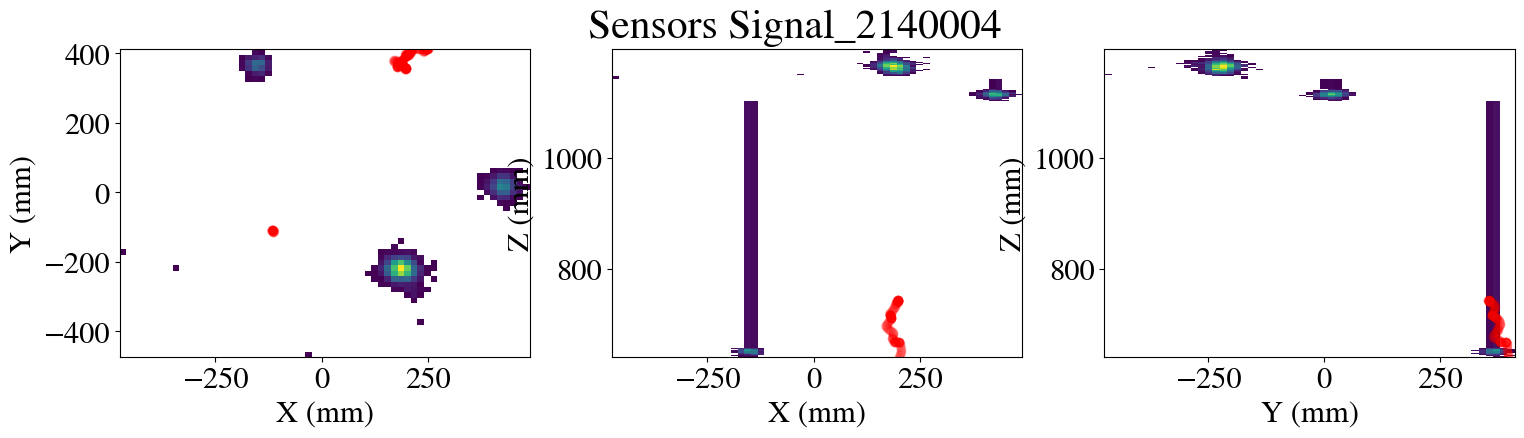

Processing: 5


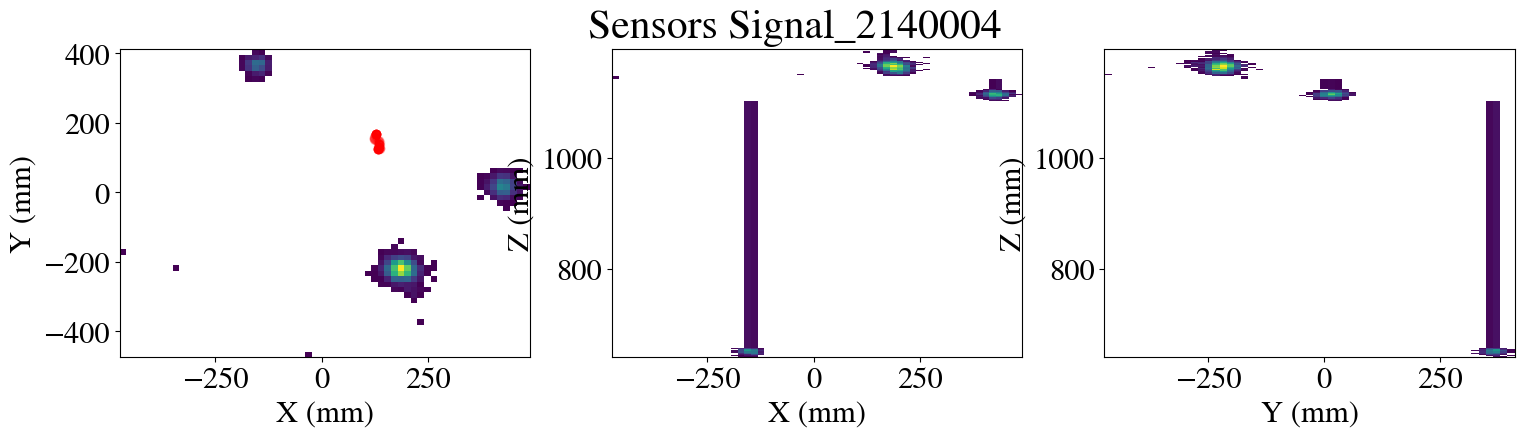

Processing: 6


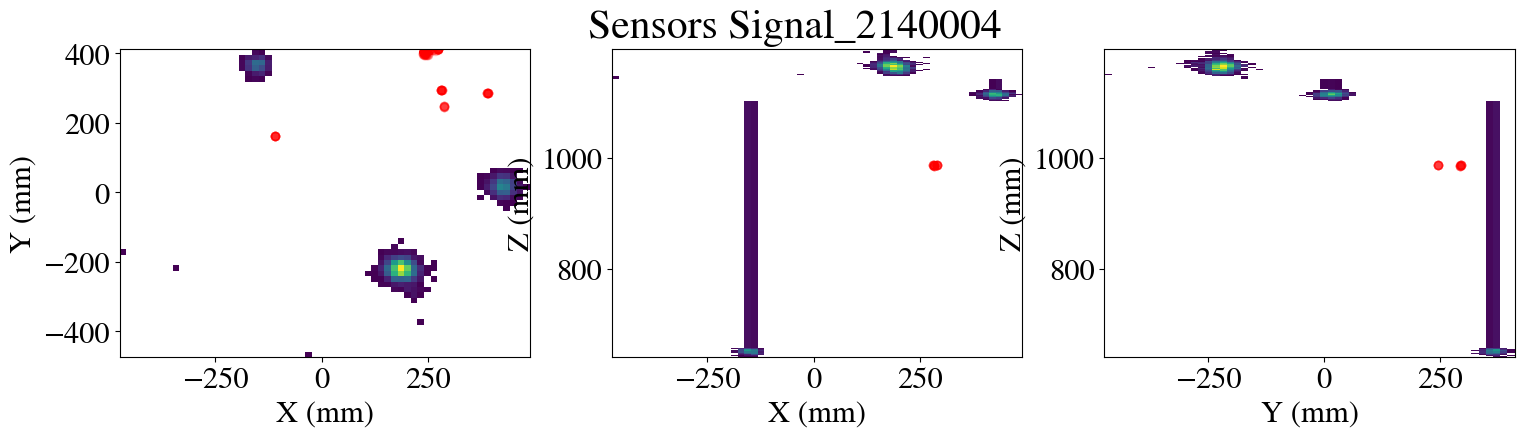

Processing: 7


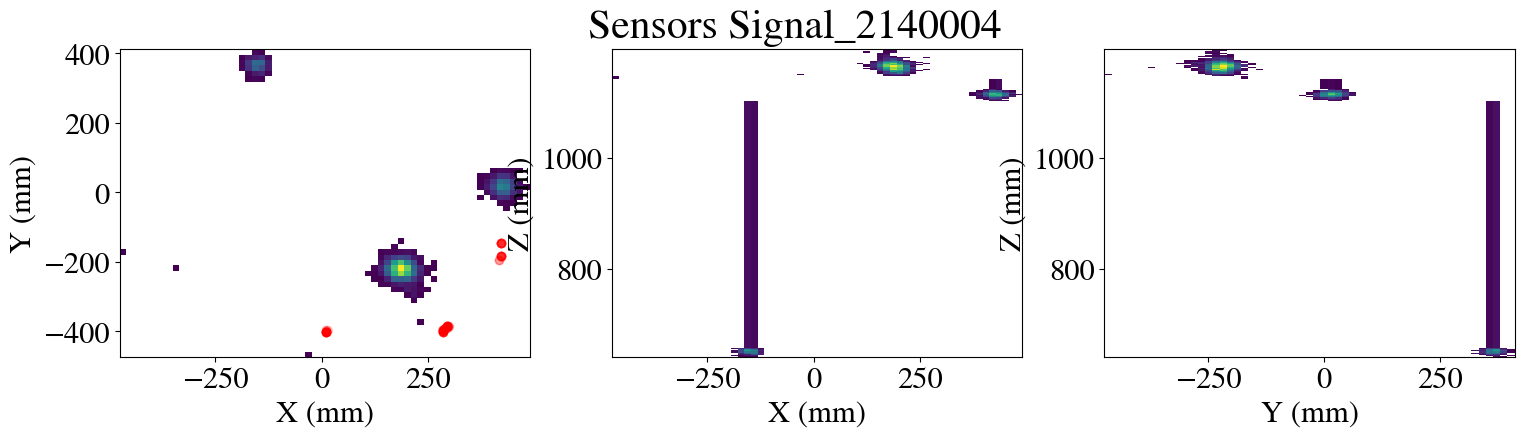

Processing: 8


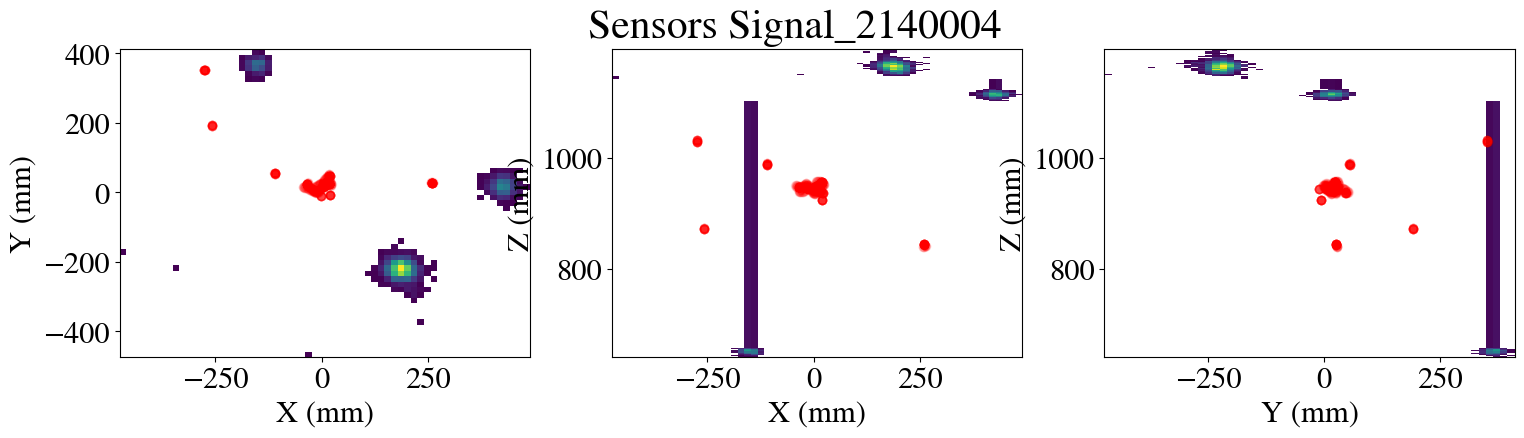

Processing: 9


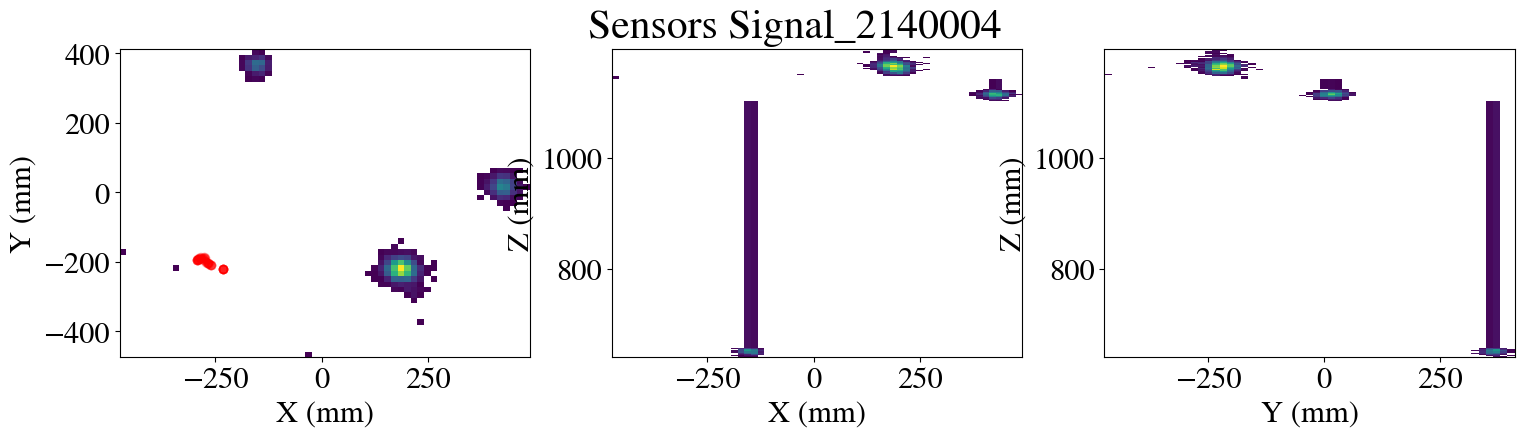

Processing: 10


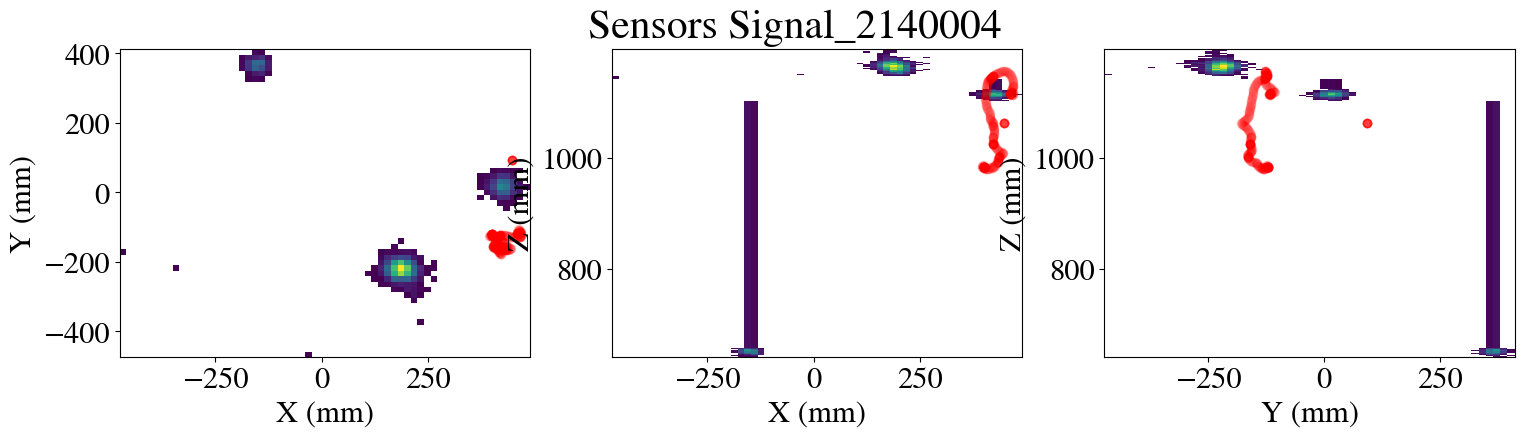

Processing: 11


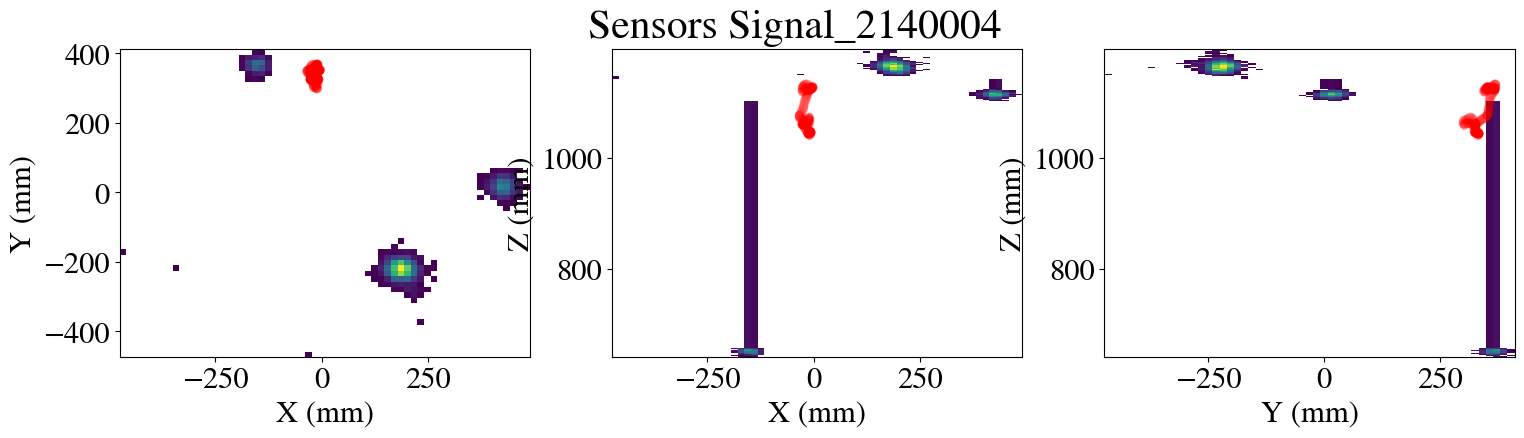

Processing: 12


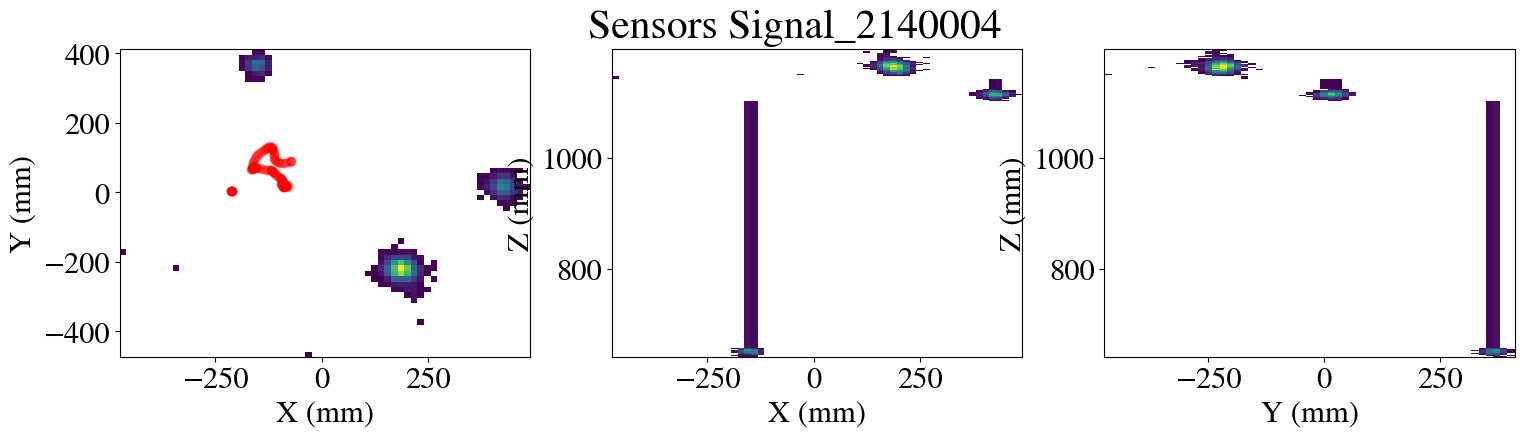

Processing: 13


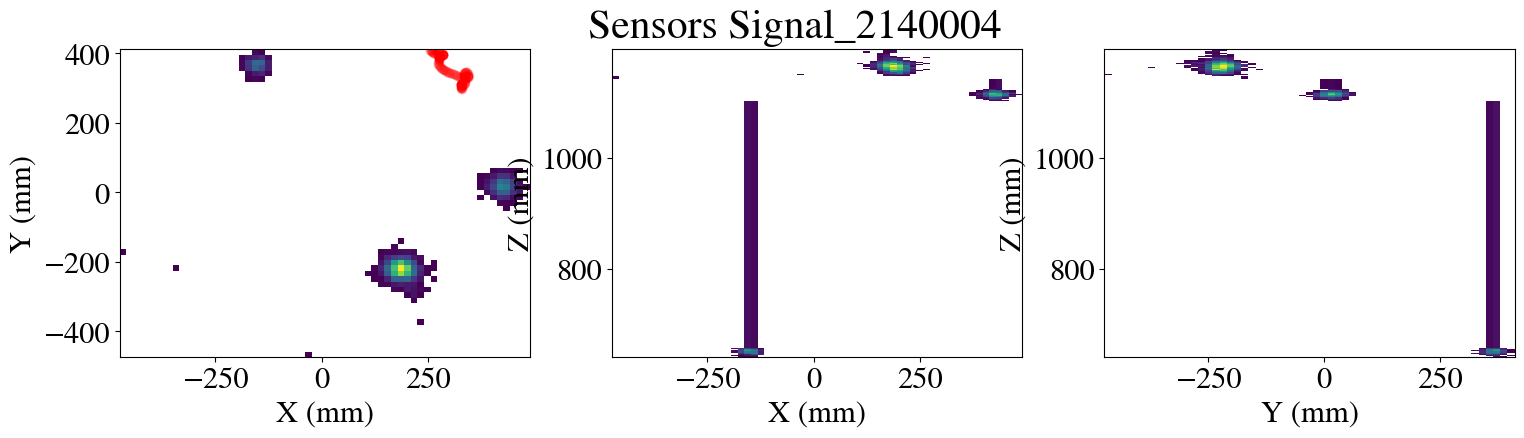

Processing: 14


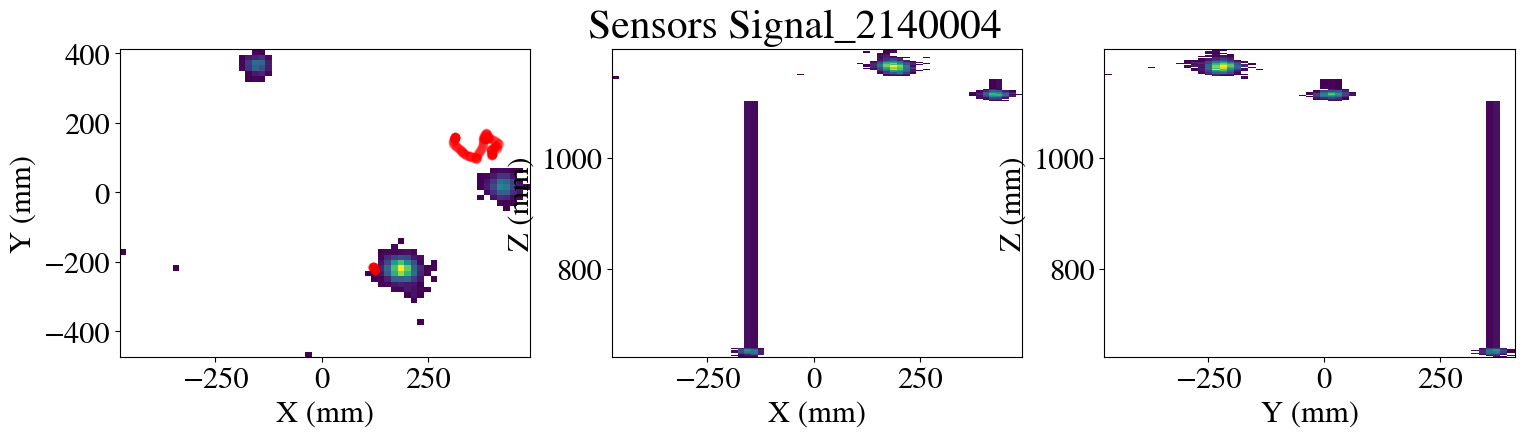

Processing: 15


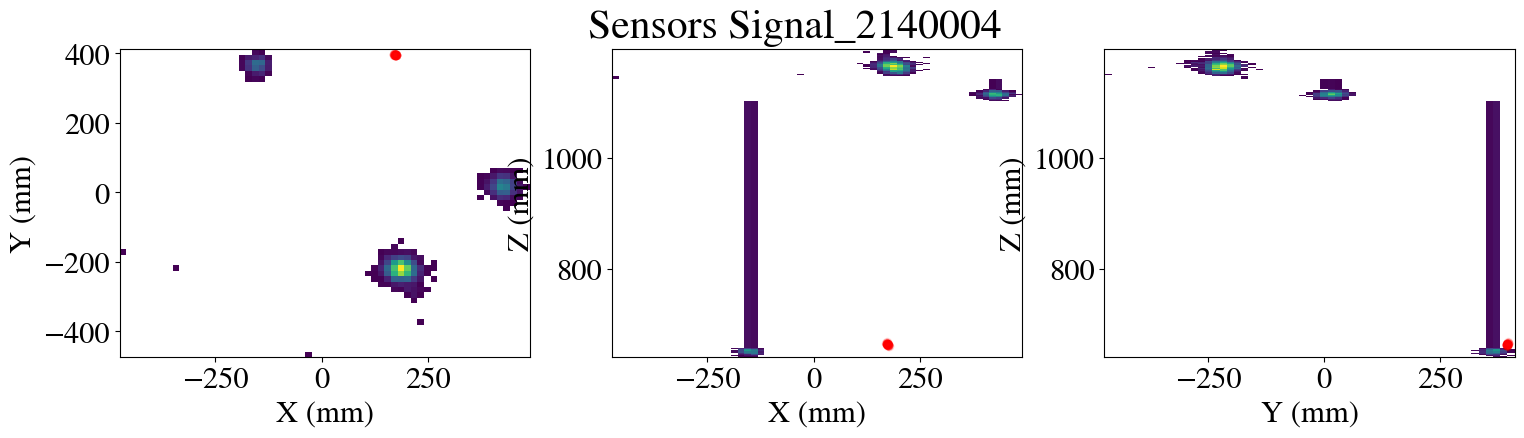

Processing: 16


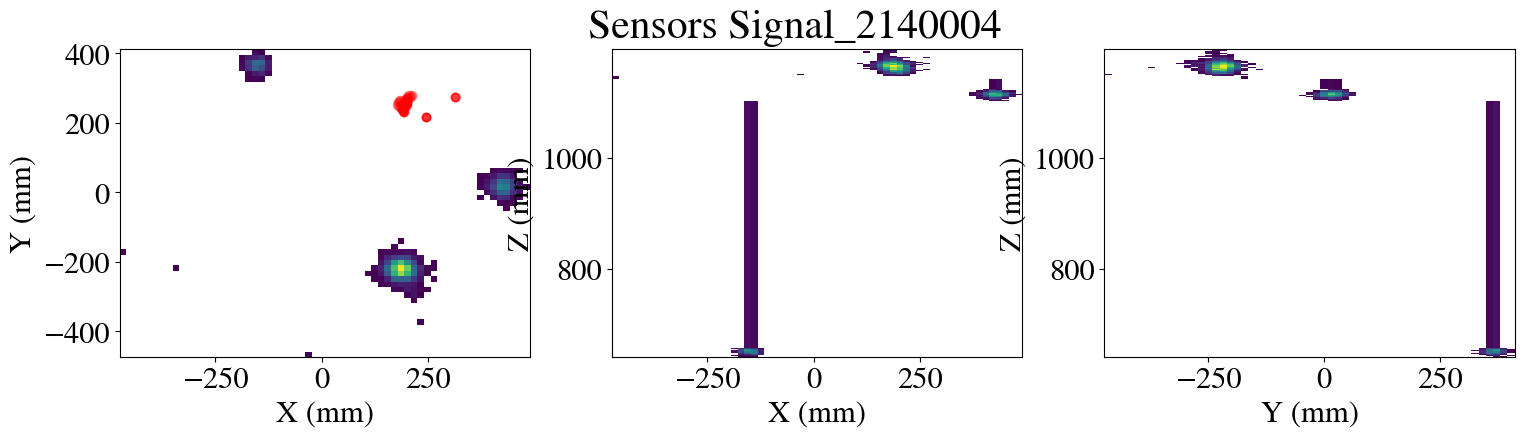

Processing: 17


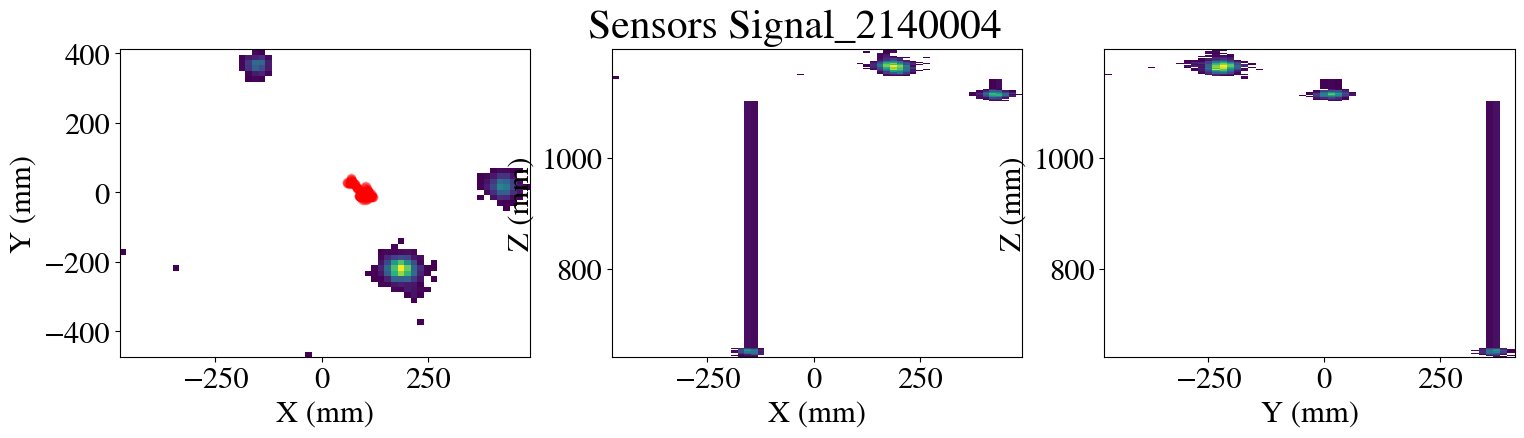

Processing: 18


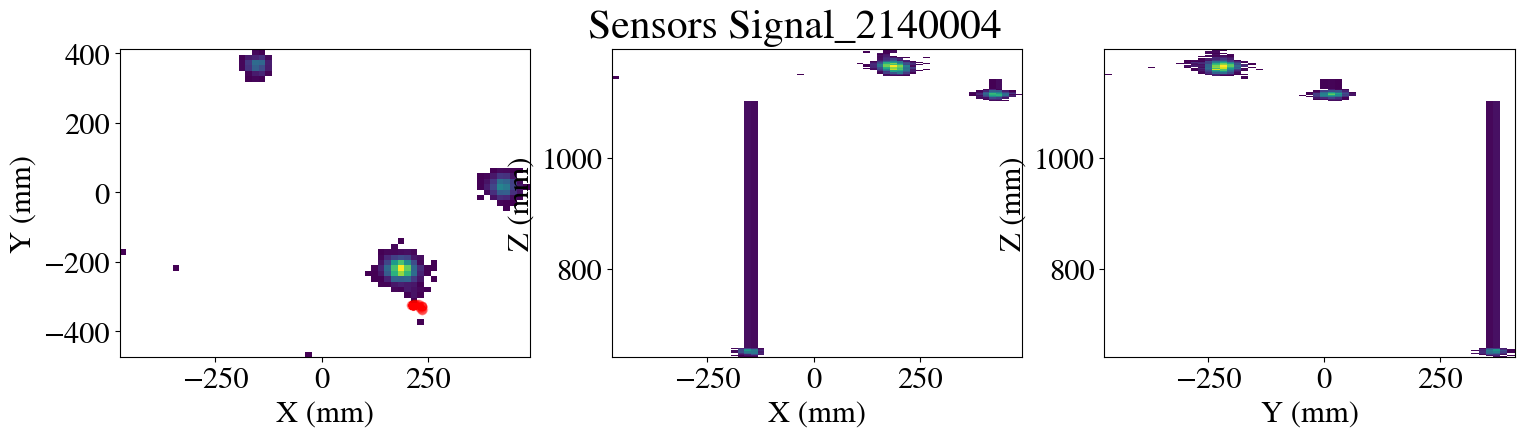

Processing: 19


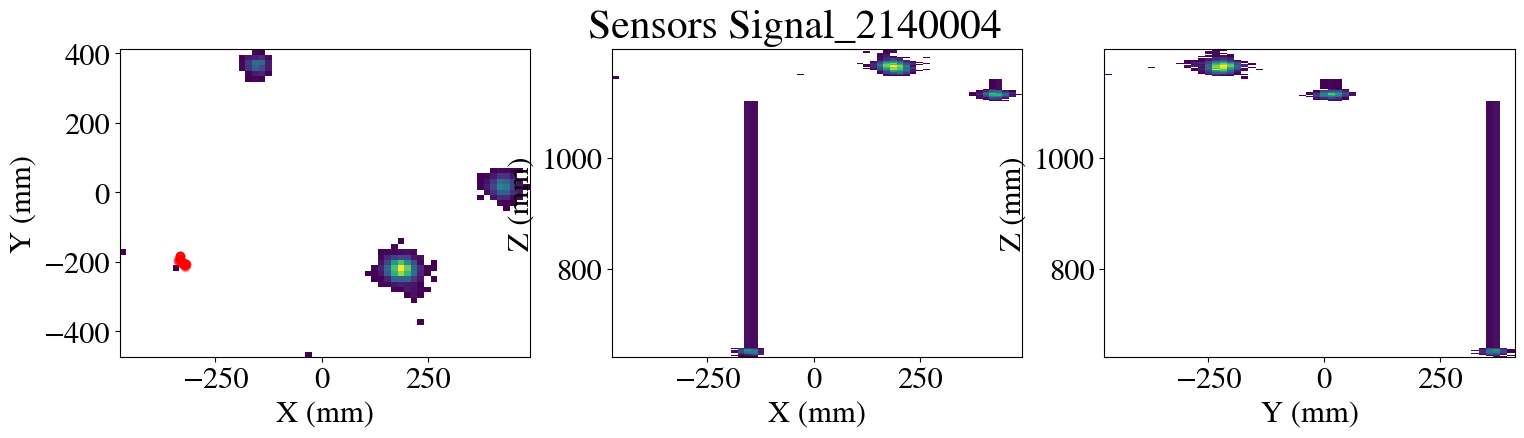

Processing: 20


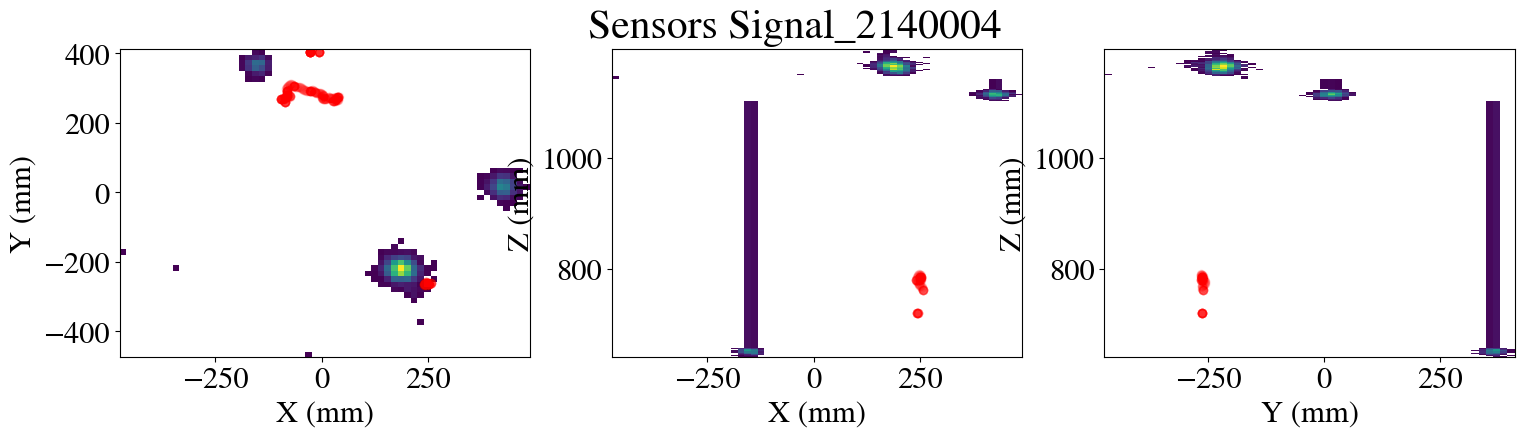

Processing: 21


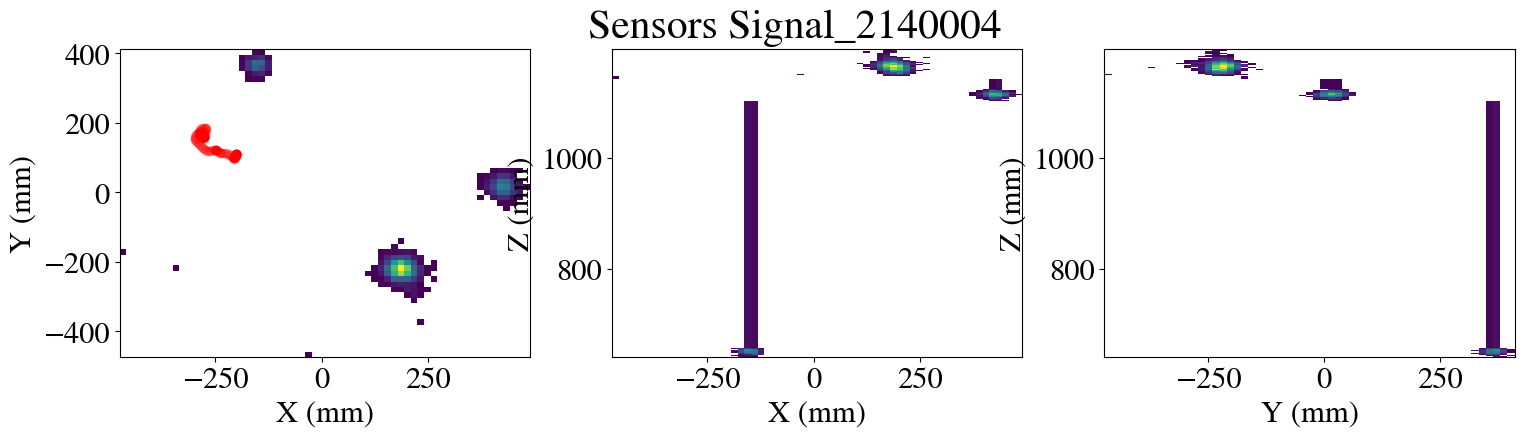

Processing: 22


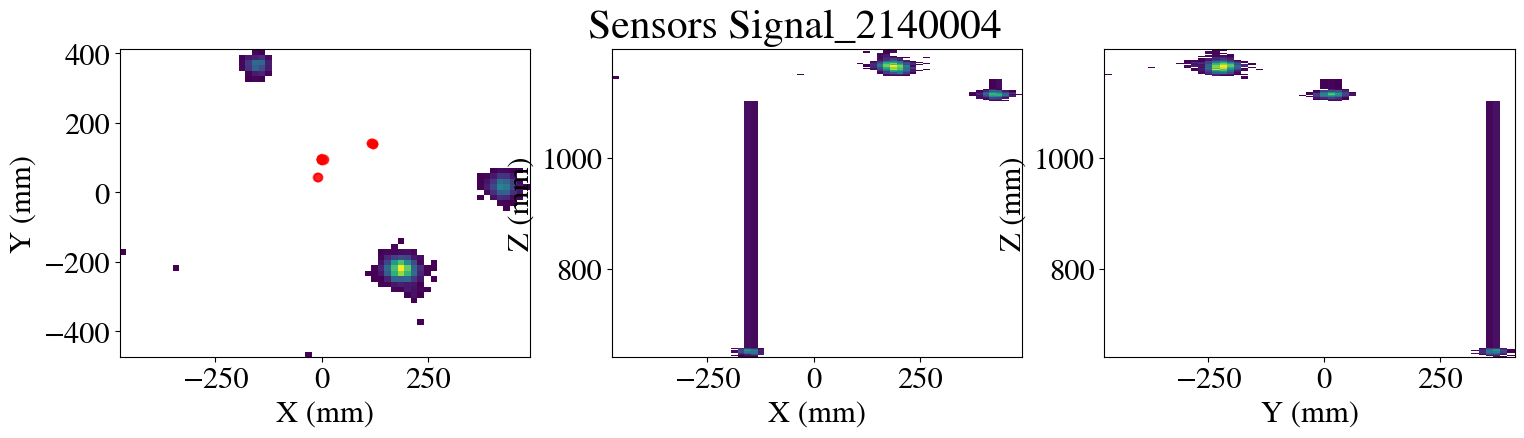

Processing: 23


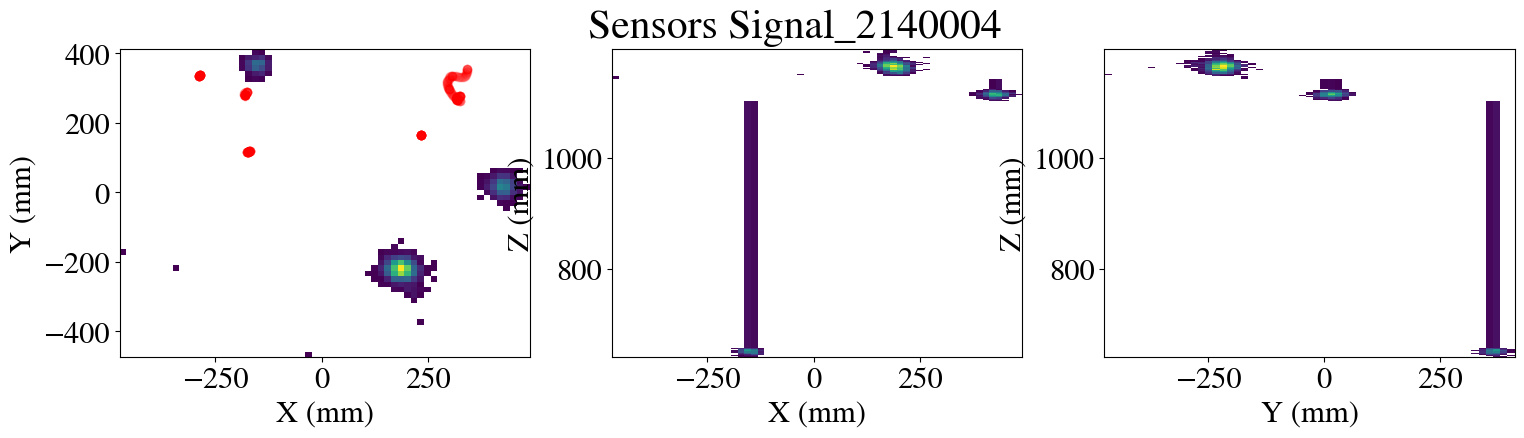

Processing: 24


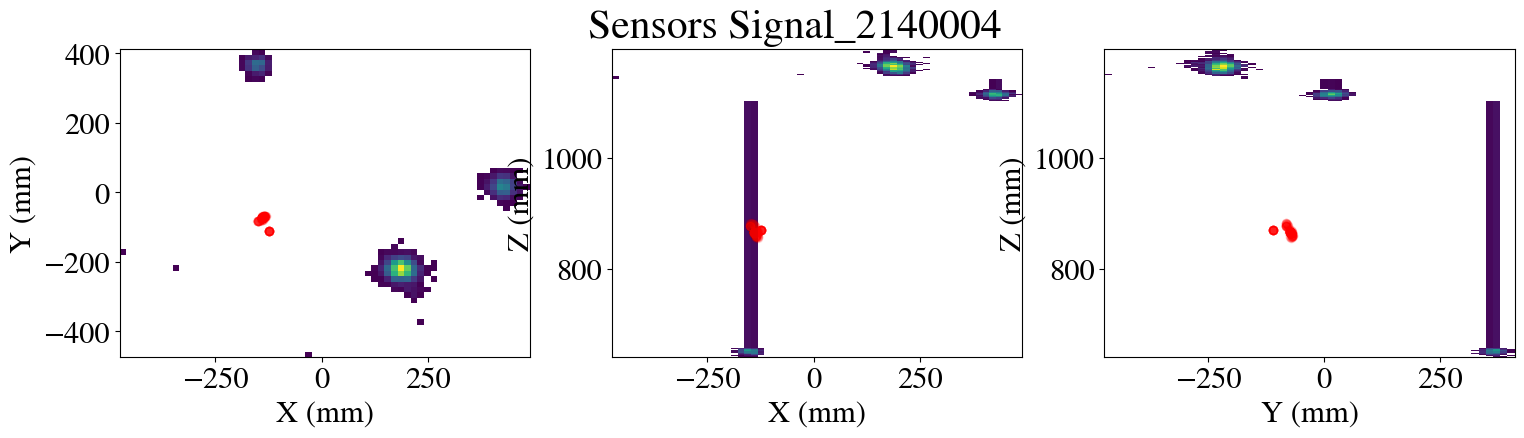

Processing: 25


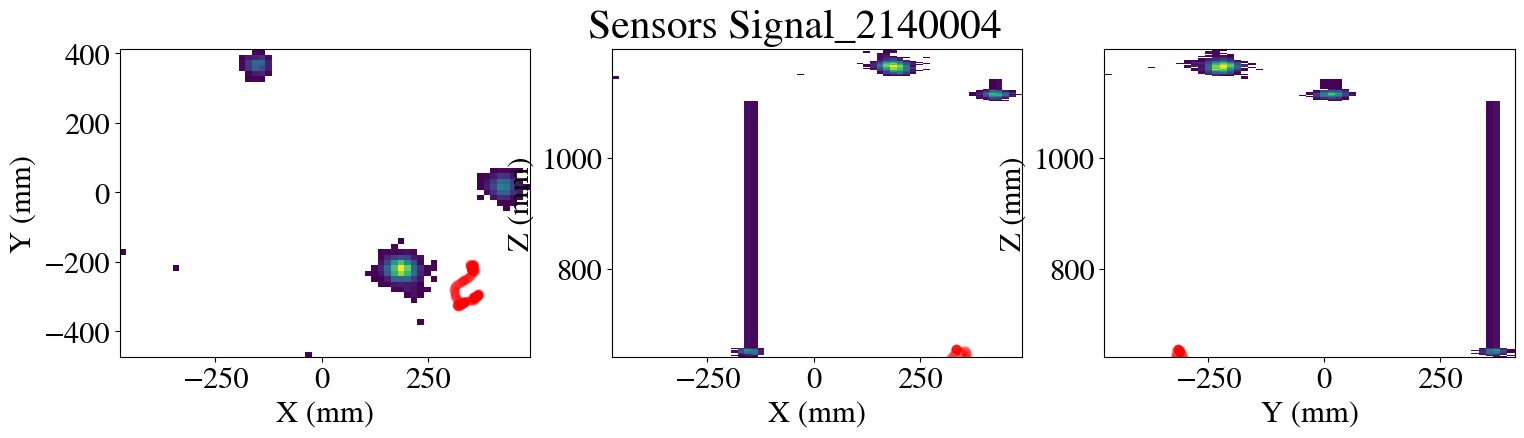

Processing: 26


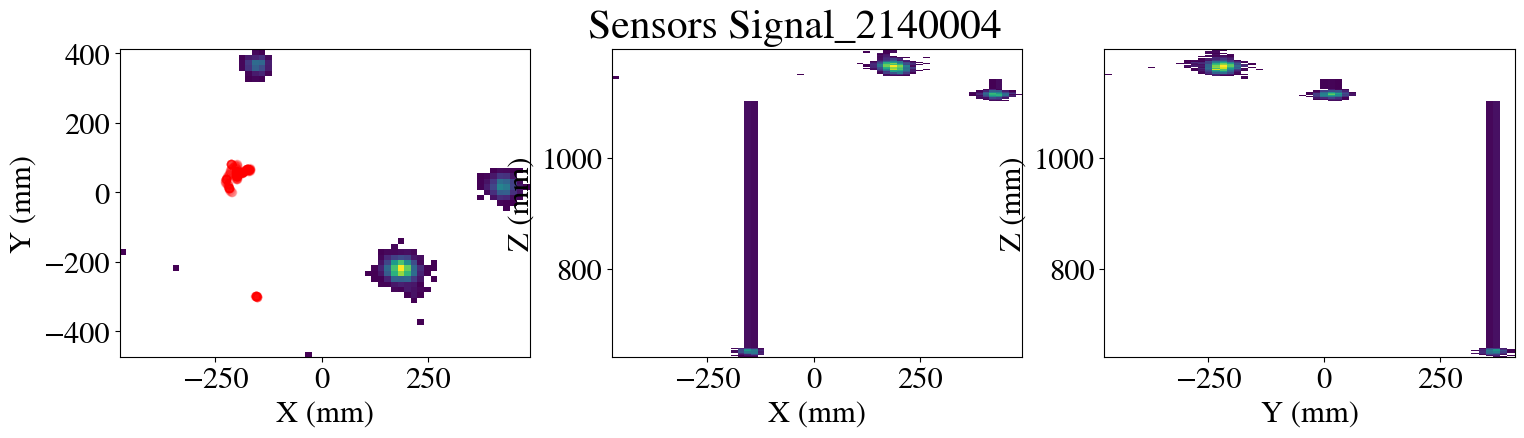

Processing: 27


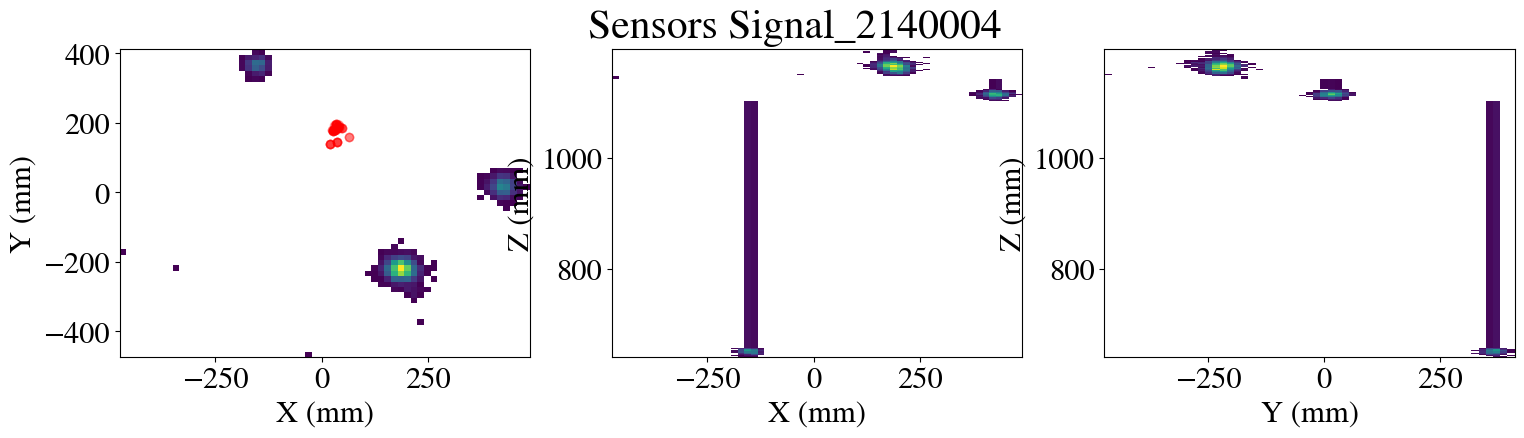

Processing: 28


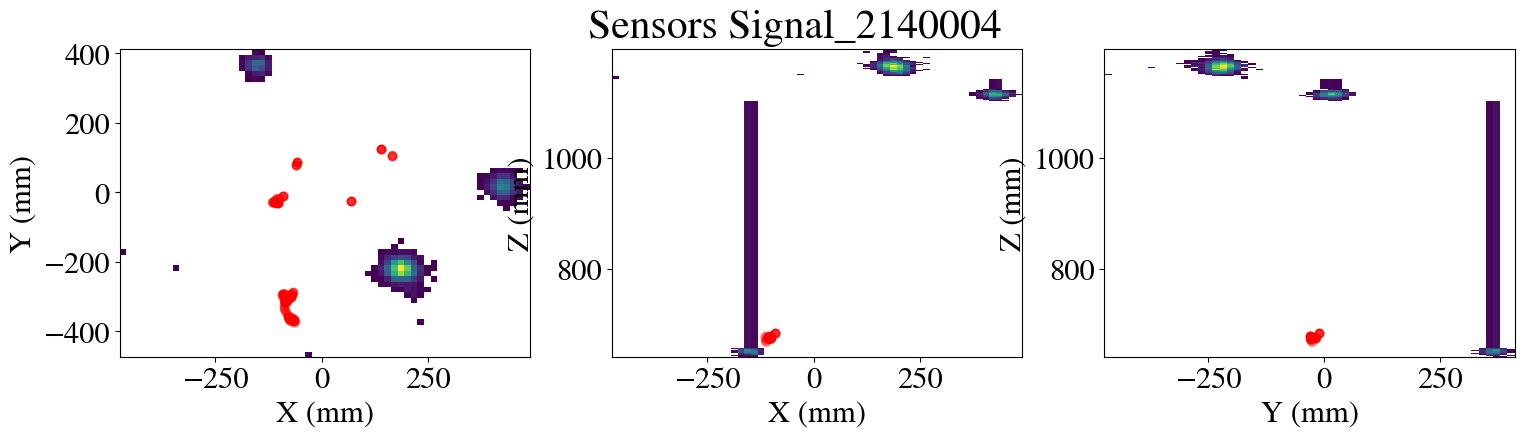

Processing: 29


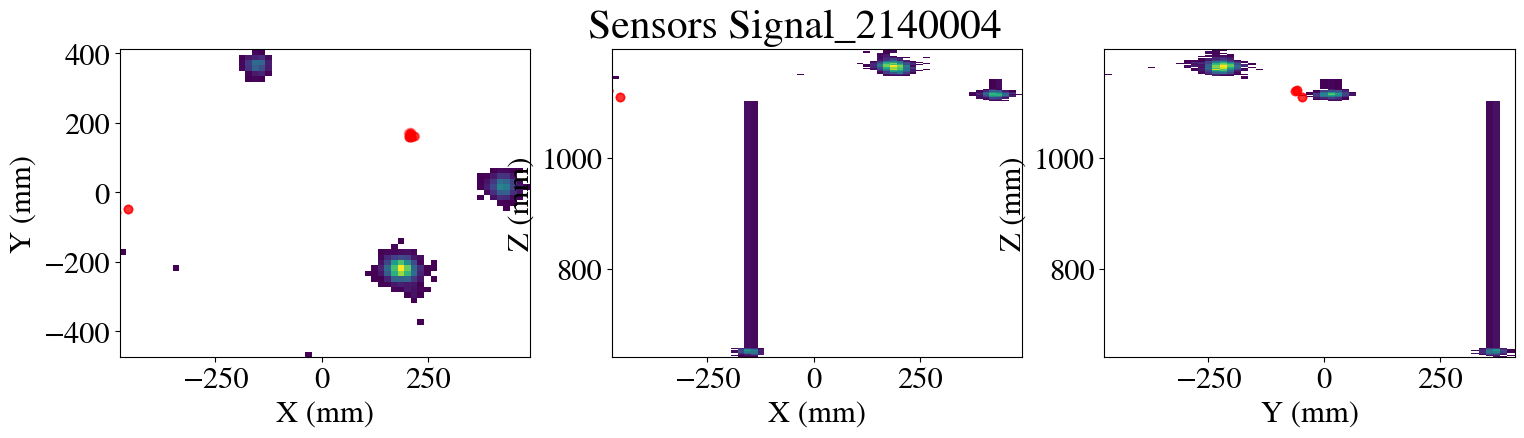

Processing: 30


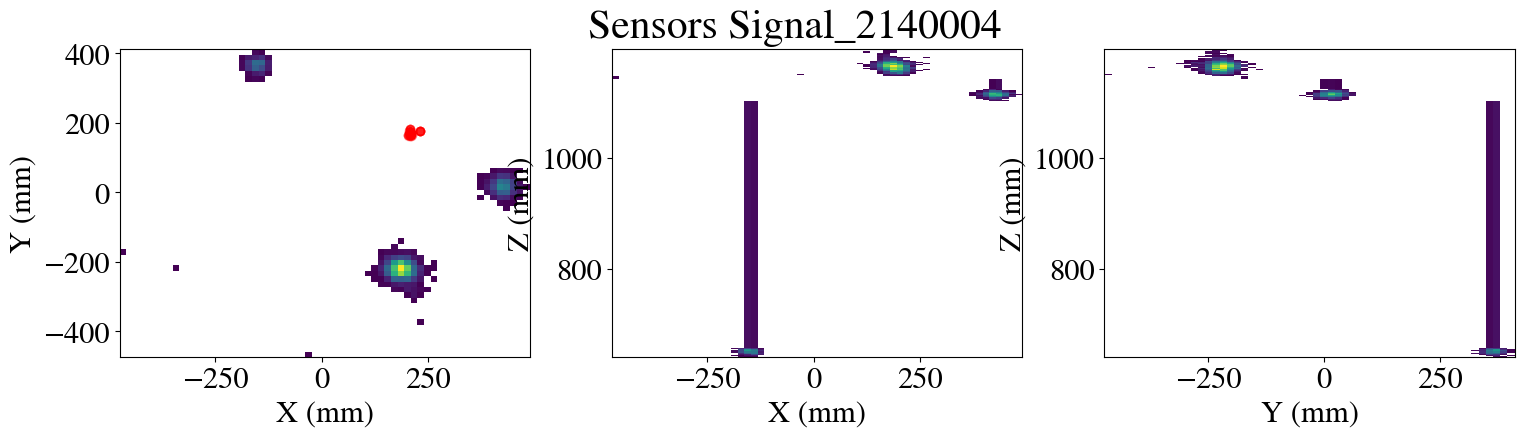

Processing: 31


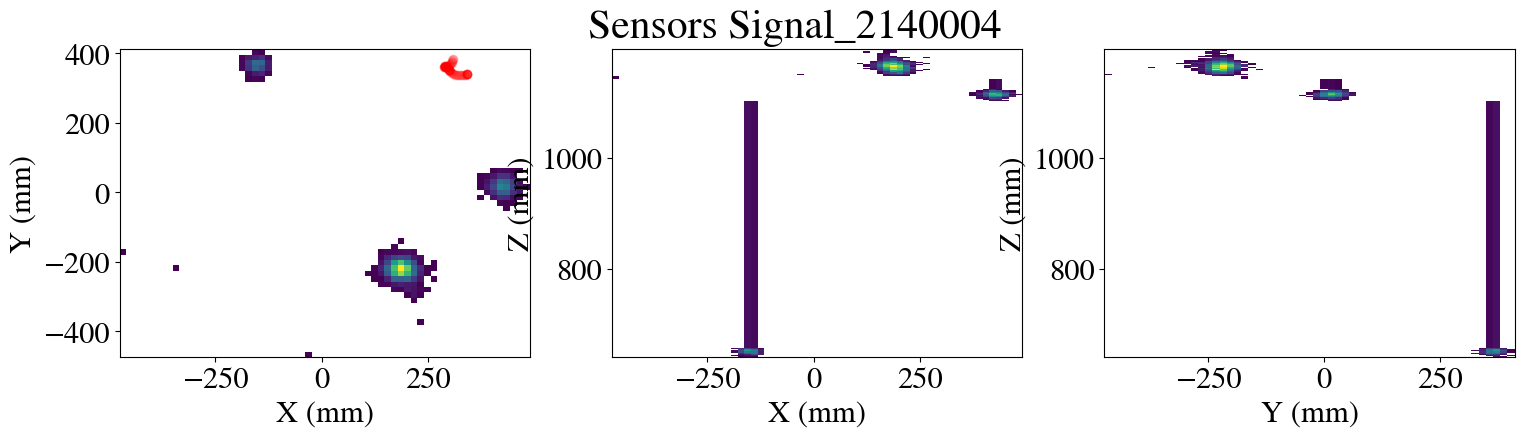

Processing: 32


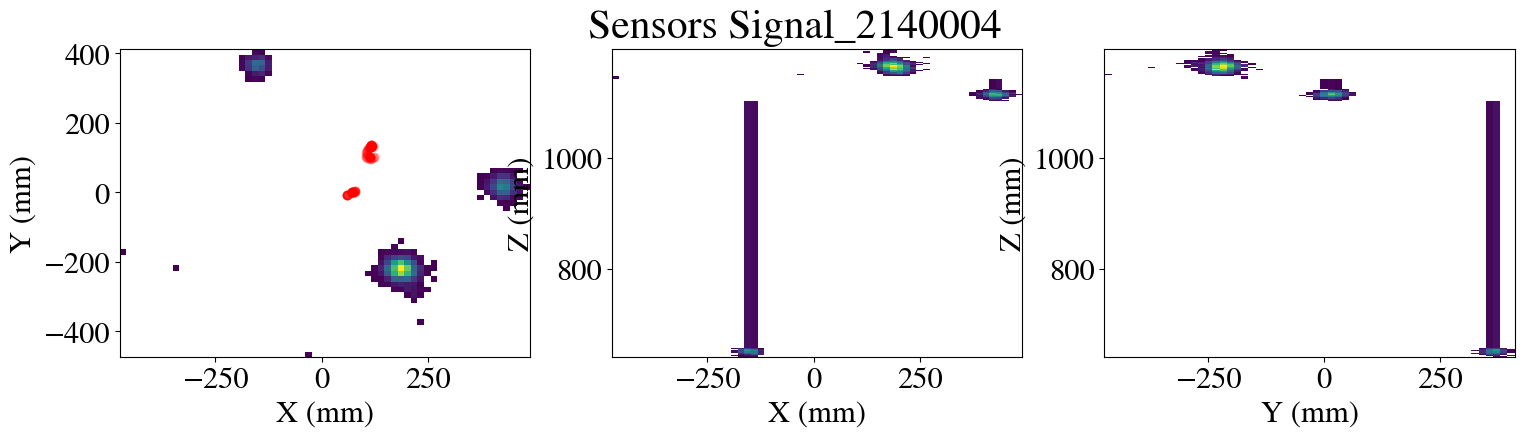

Processing: 33


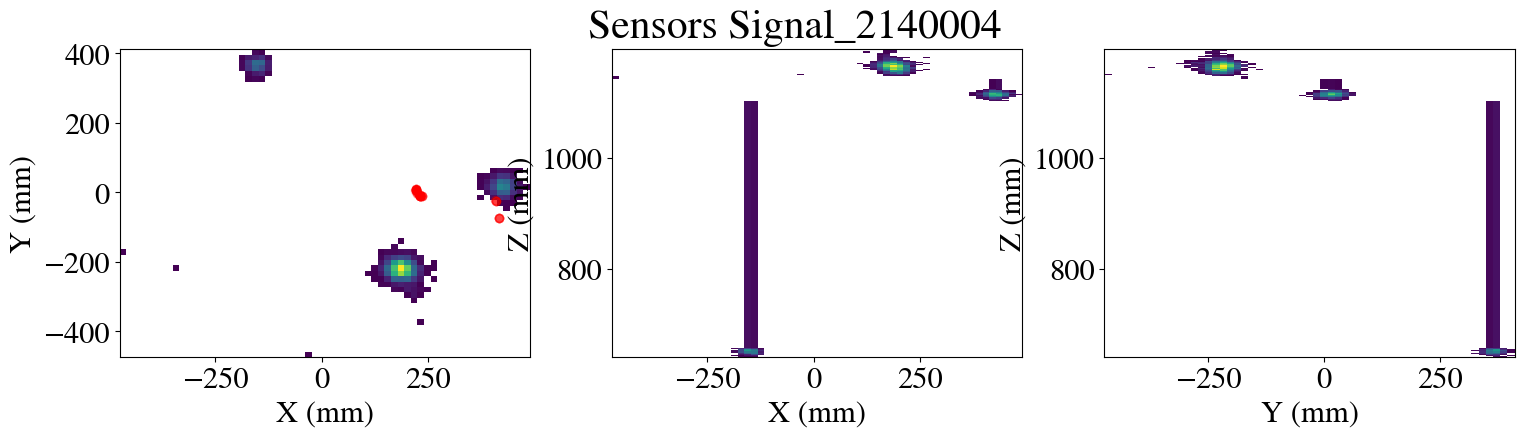

Processing: 34


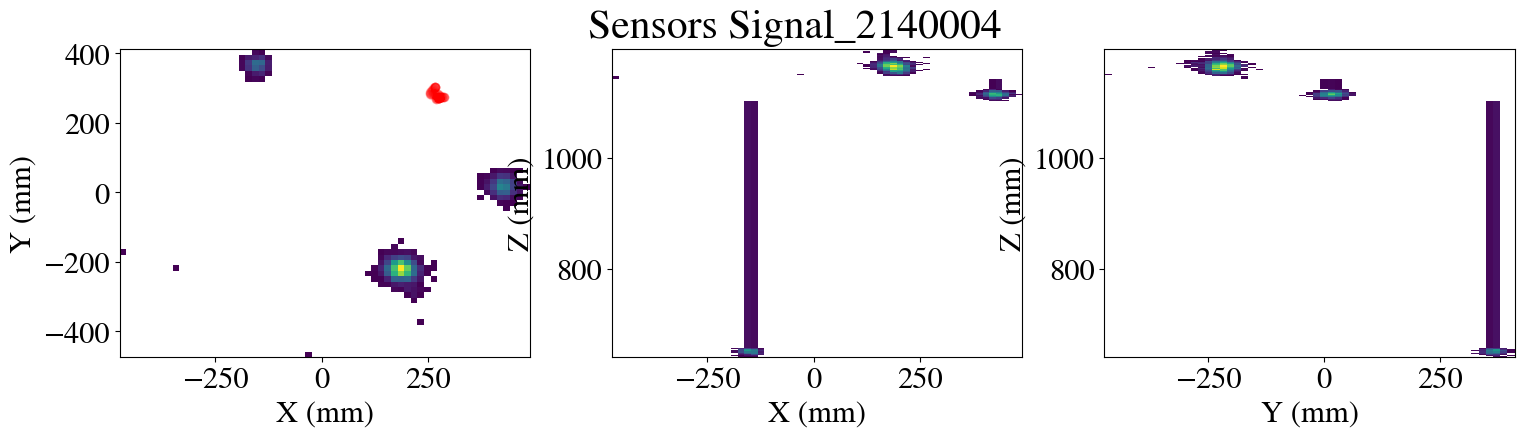

Processing: 35


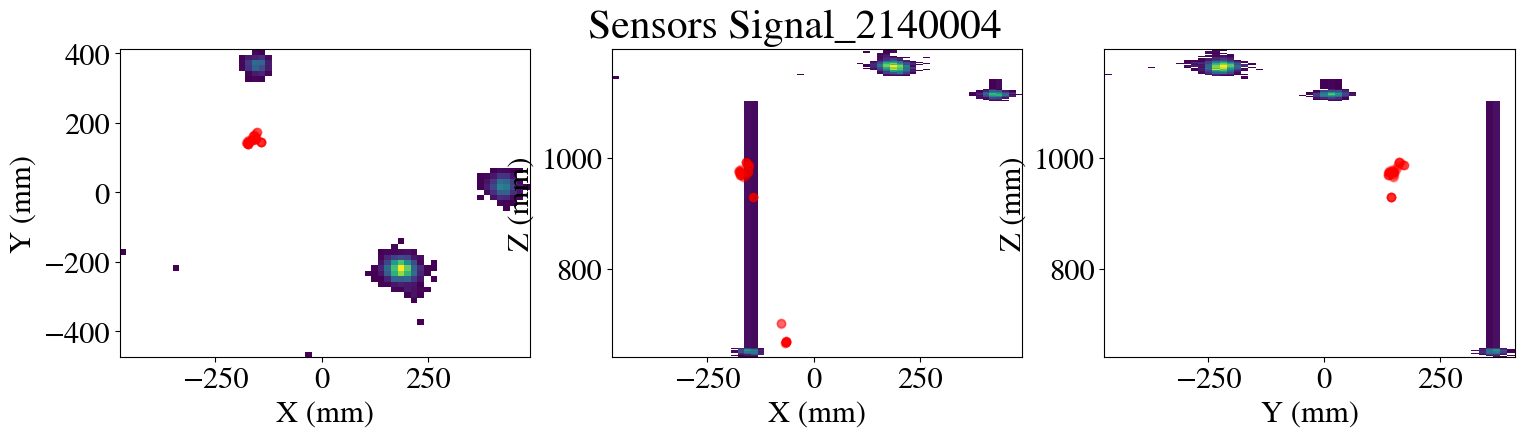

Processing: 36


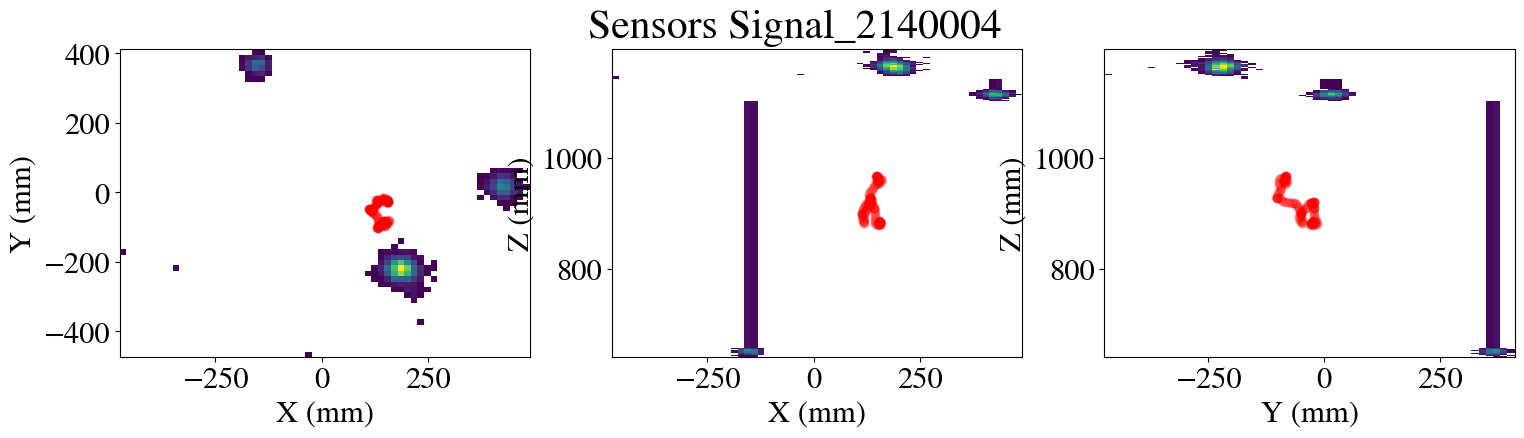

Processing: 37


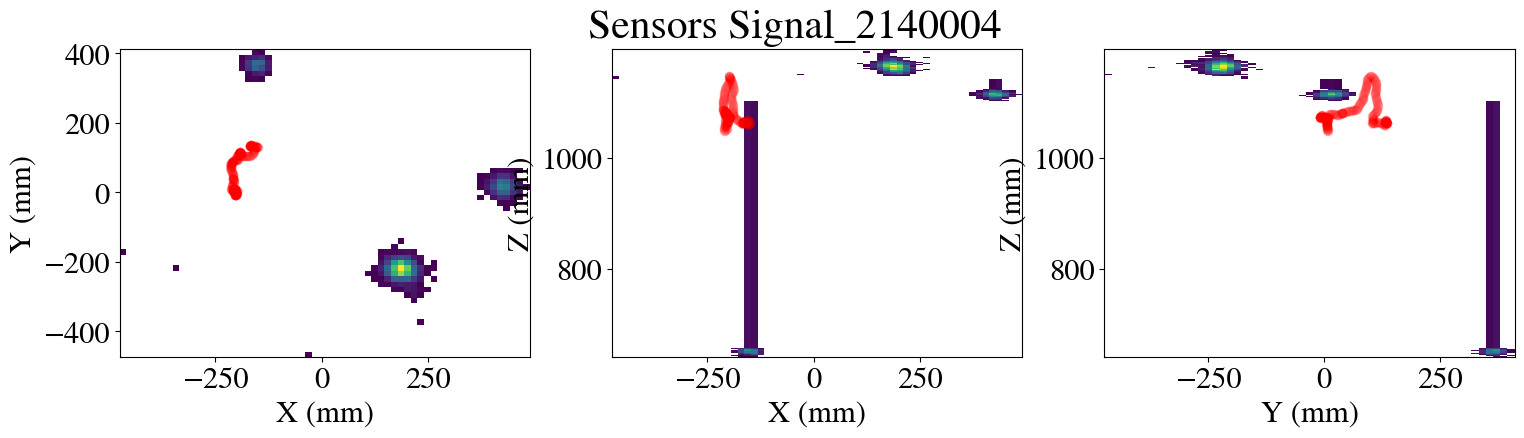

Processing: 38


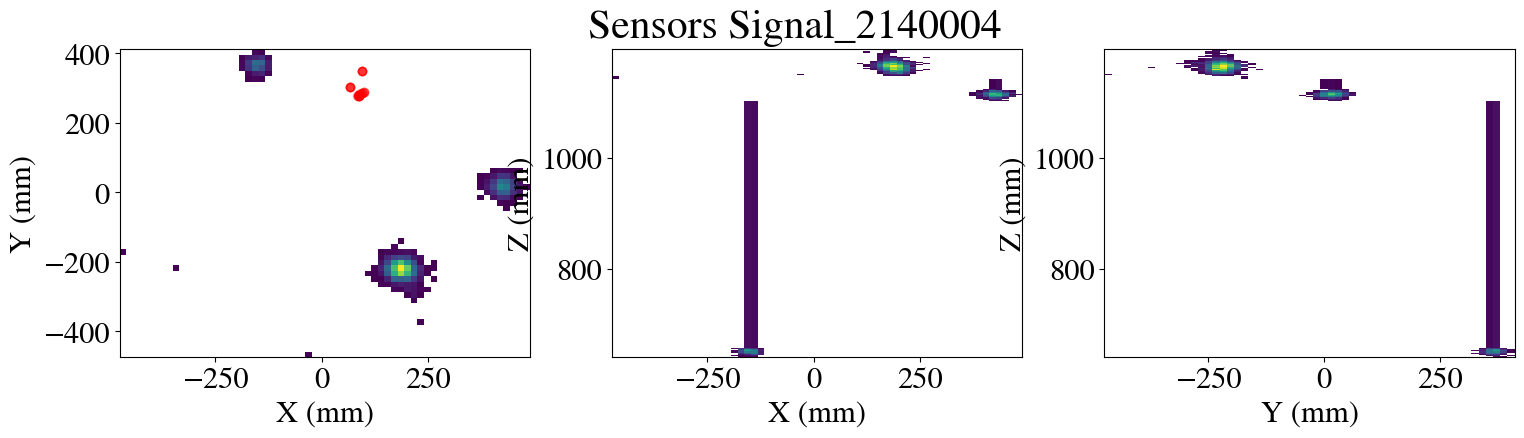

Processing: 39


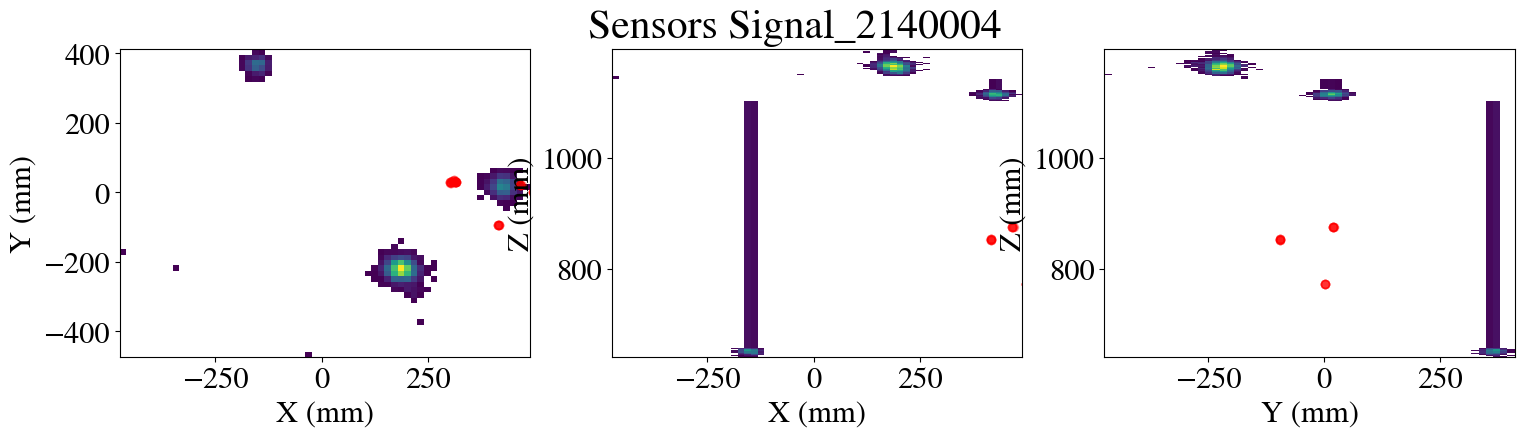

Processing: 40


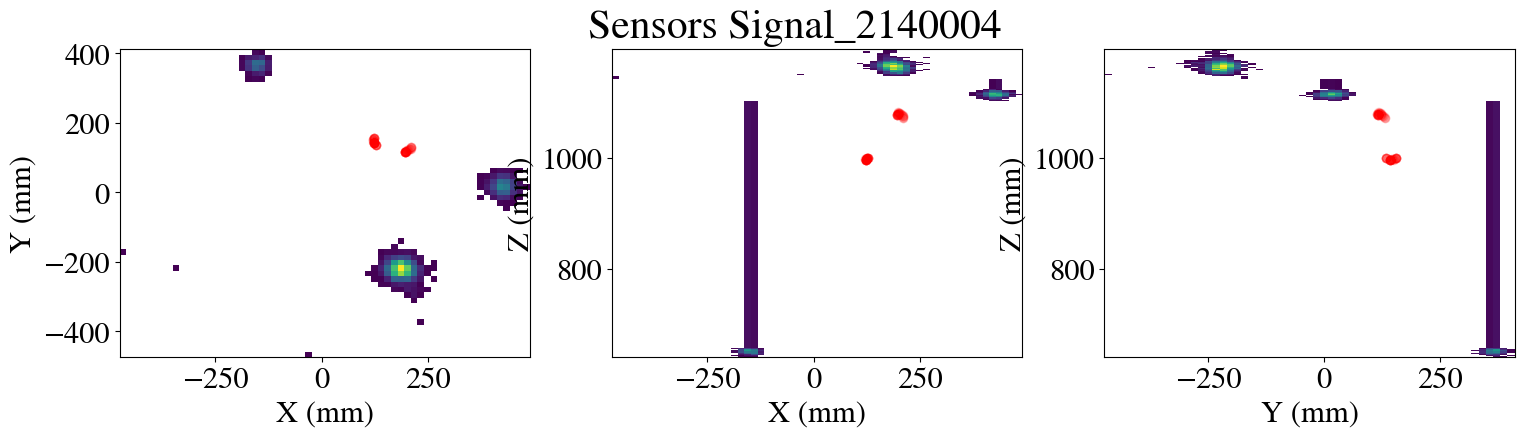

Processing: 41


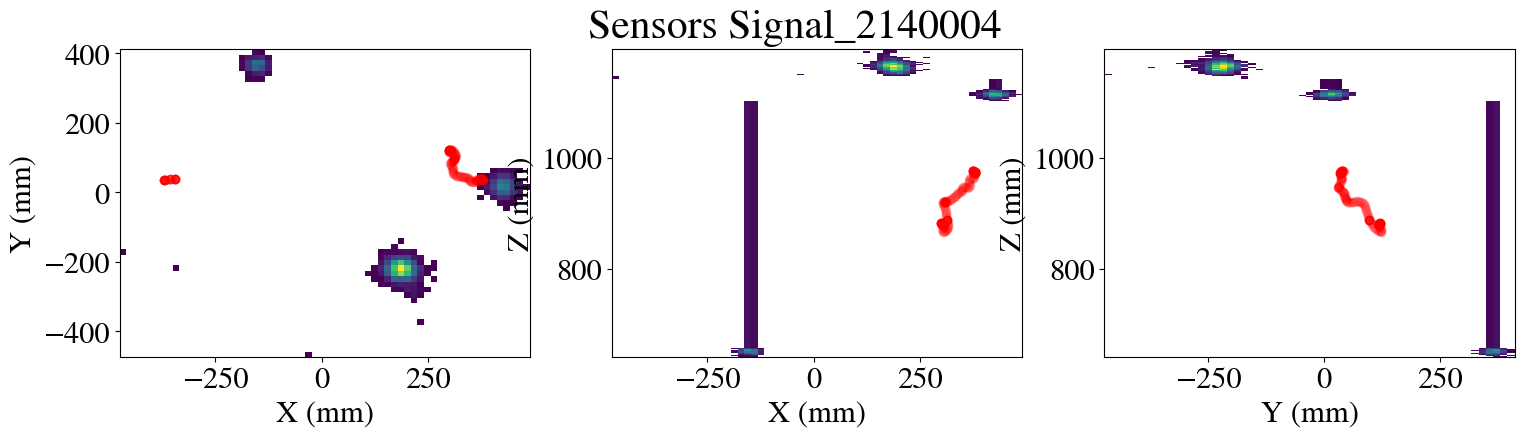

Processing: 42


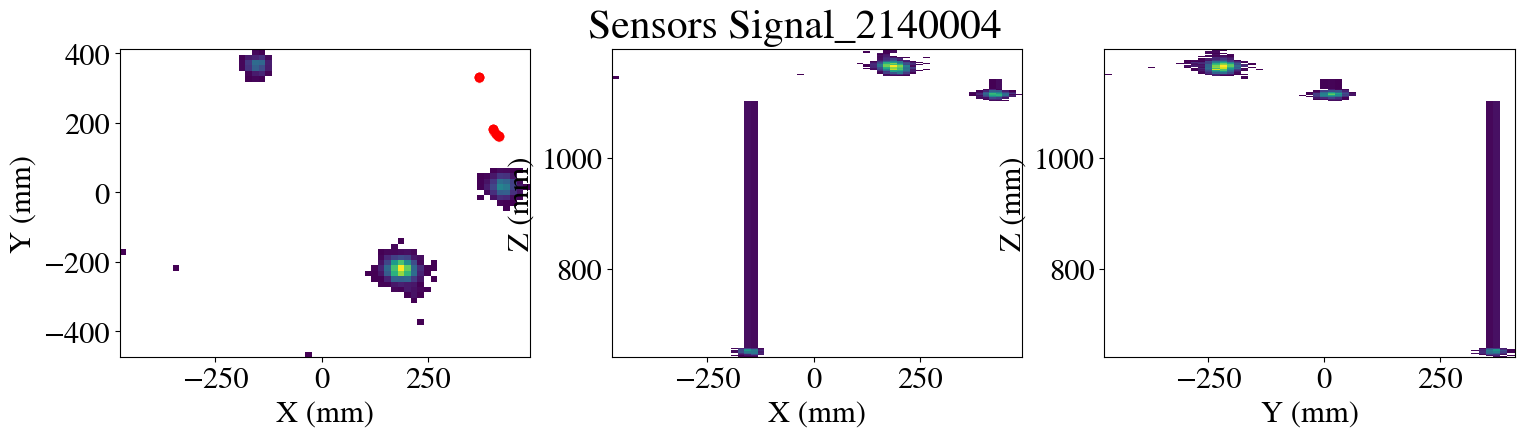

Processing: 43


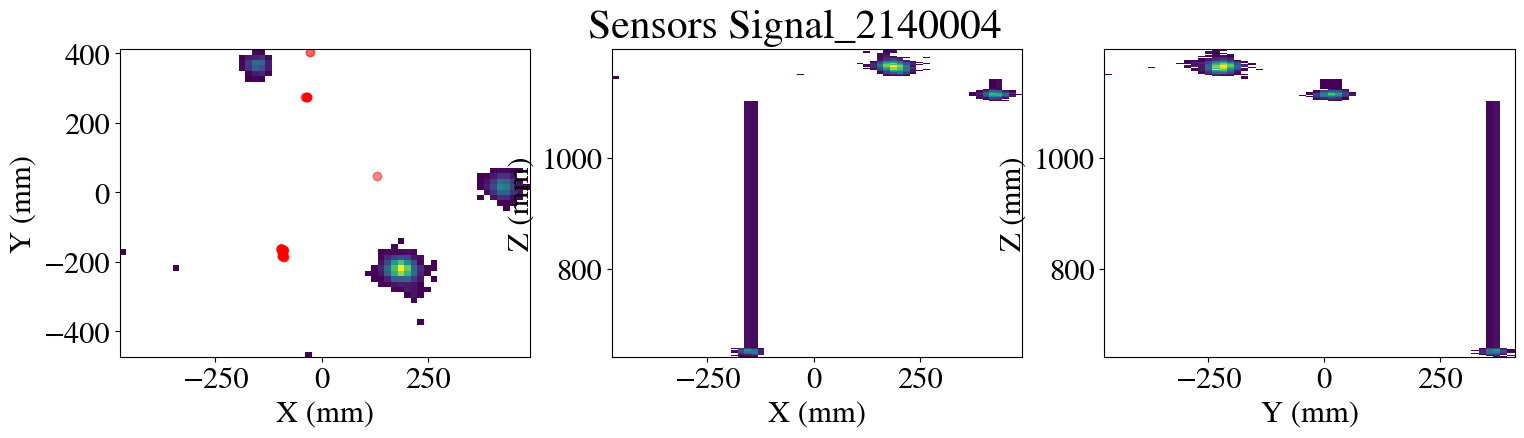

Processing: 44


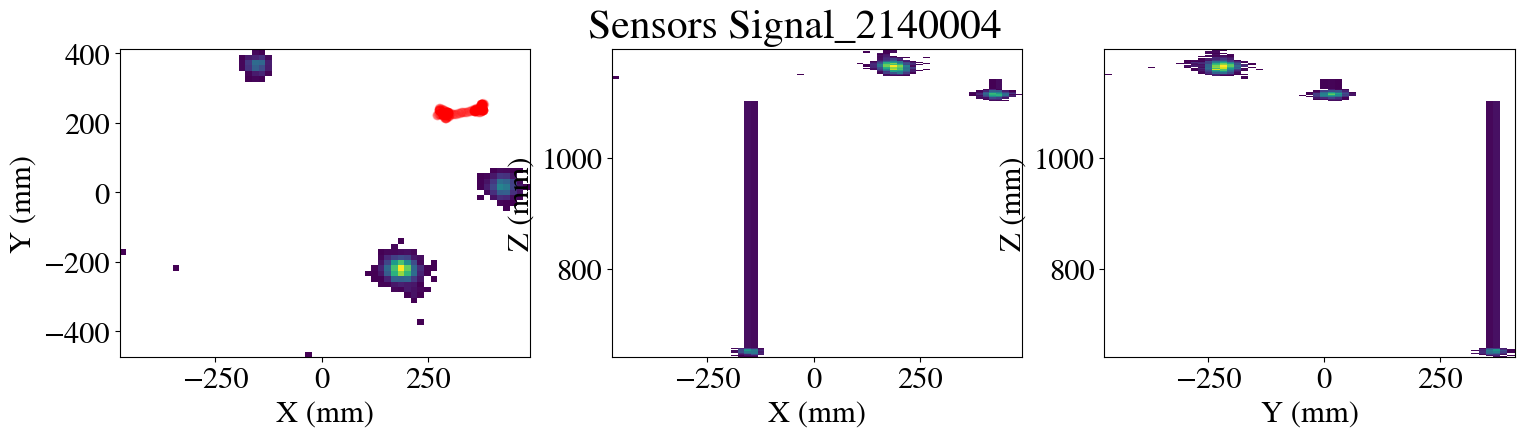

Processing: 45


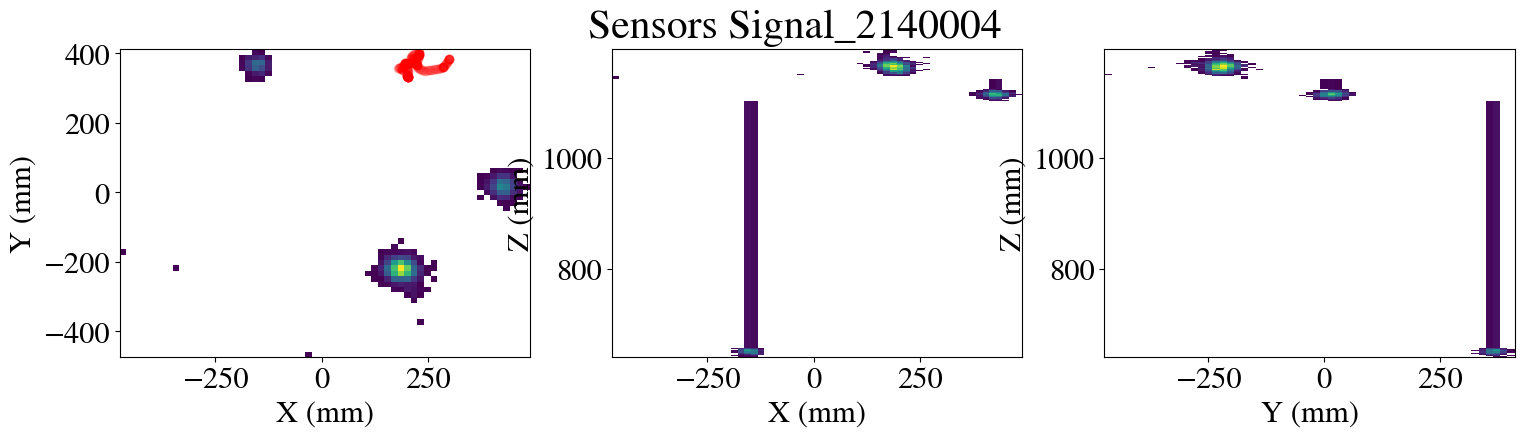

Processing: 46


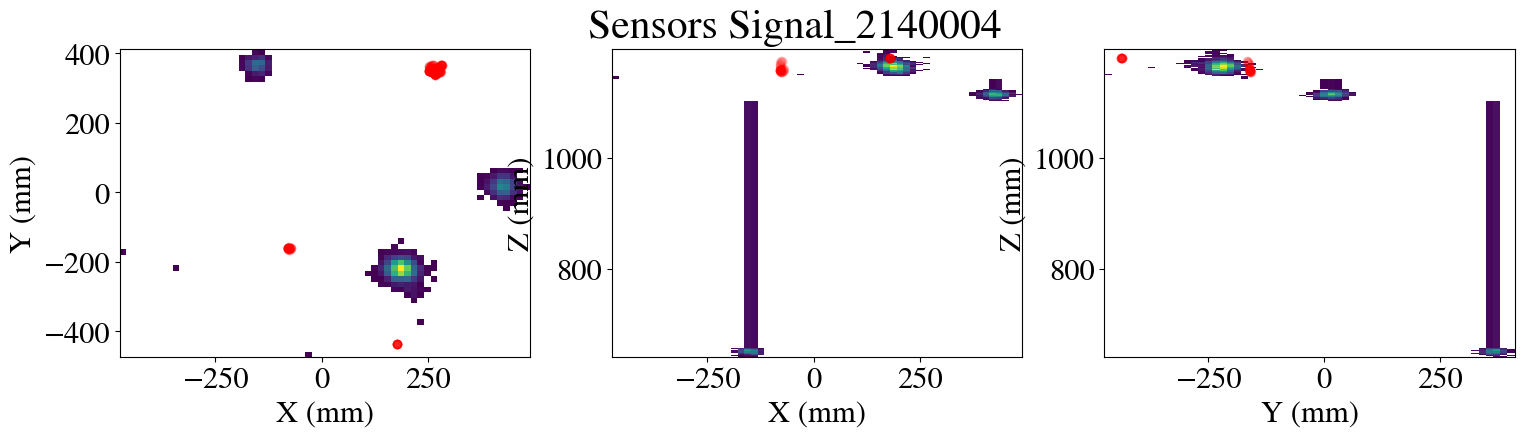

Processing: 47


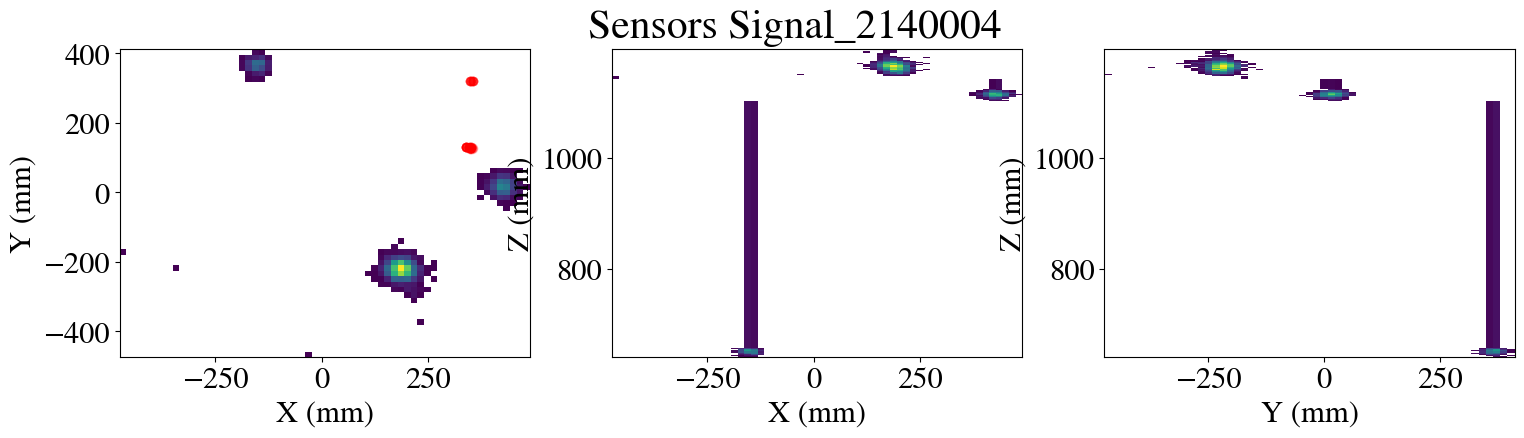

Processing: 48


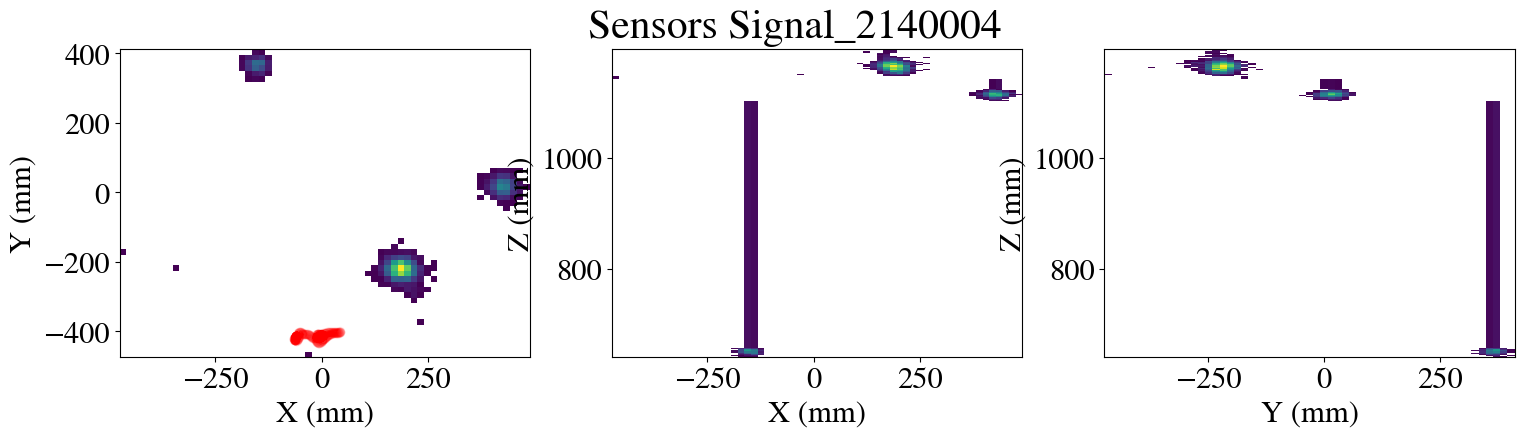

Processing: 49


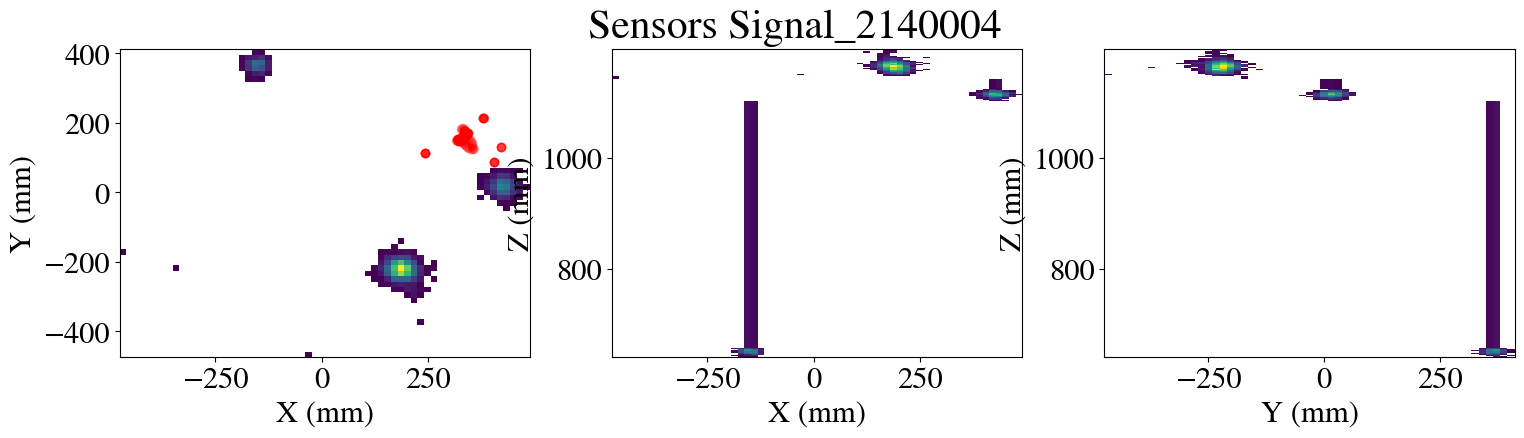

Processing: 50


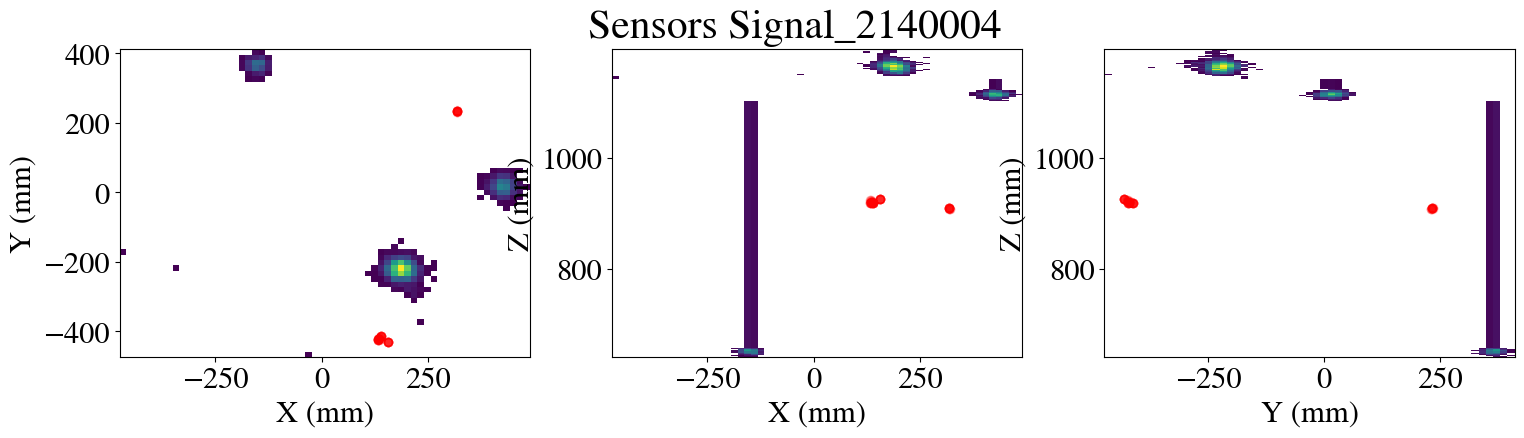

Processing: 51


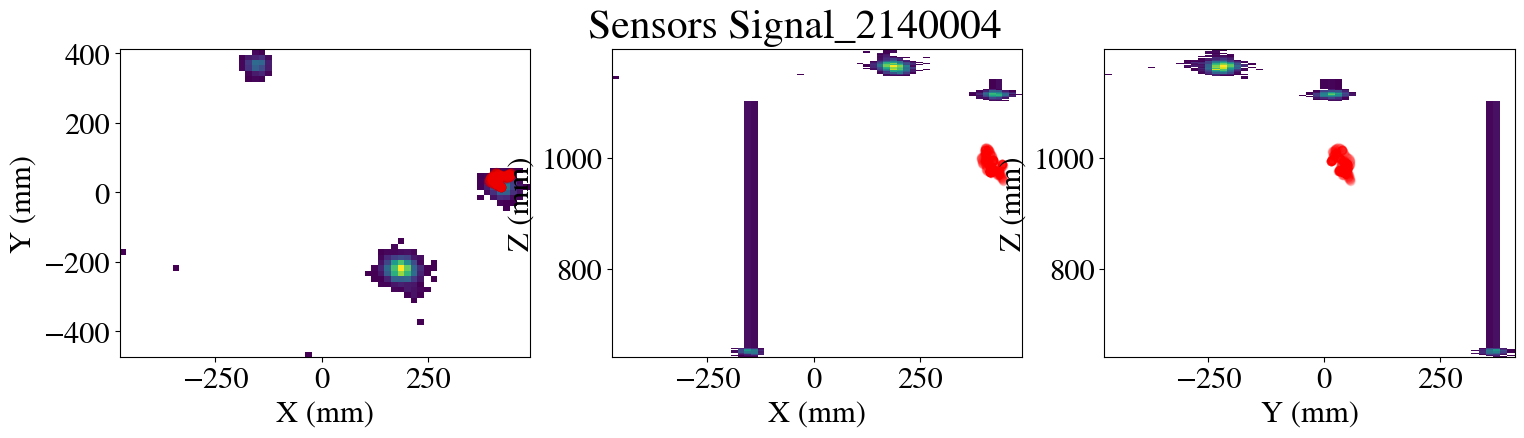

Processing: 52


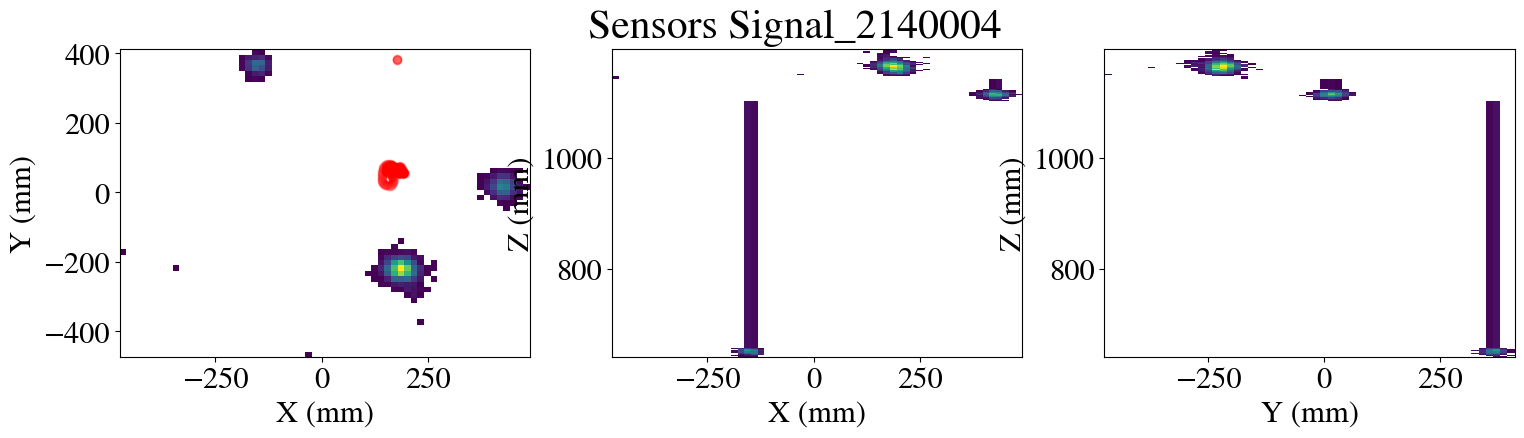

Processing: 53


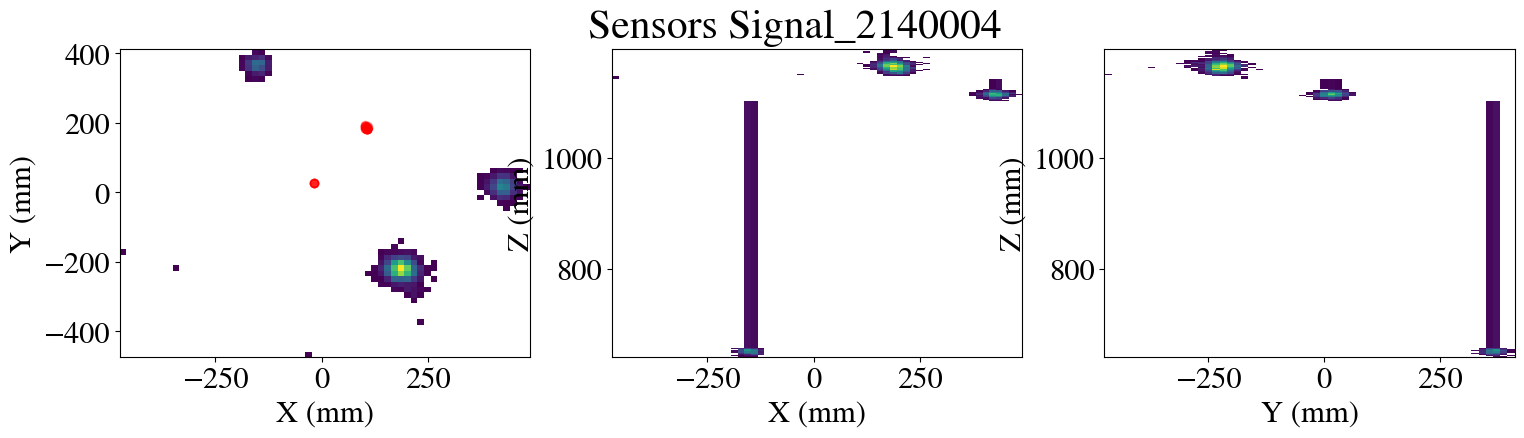

In [34]:


# load data
# checking the event
hdst = dstio.load_dst(file_, 'RECO', 'Events') # this is atrociously inefficient


for i in range(len(event_ids)):

    print("Processing: {}".format(i))
    # now take the relevant event only
    hdst_event = (hdst[hdst['event'] == event_ids[i]])

    # generate low threshold
    hits = soph_to_lowTh(hdst_event, threshold = threshold, verbose = False)



    this_evt_true_info = true_info[true_info.event_id == event_ids[i]]

    xt = this_evt_true_info.x
    yt = this_evt_true_info.y
    zt = this_evt_true_info.z
    et = this_evt_true_info.energy*1000

    xx = np.arange(hits.X.min(), hits.X.max() + pitch, pitch)
    yy = np.arange(hits.Y.min(), hits.Y.max() + pitch, pitch)
    zz = hits.Z.unique()


    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    axes[0].hist2d(hits.X, hits.Y, bins=[xx, yy], weights=hits.Q, cmin=0.0001);
    axes[0].scatter(xt, yt,  alpha=0.05, color='red')
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(hits.X, hits.Z, bins=[xx, zz], weights=hits.Q, cmin=0.0001);
    axes[1].scatter(xt, zt,  alpha=0.05, color='red')
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(hits.Y, hits.Z, bins=[yy, zz], weights=hits.Q, cmin=0.0001);
    axes[2].scatter(yt, zt,  alpha=0.05, color='red')
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');

    fig.suptitle('Sensors Signal_' + str(event_ids[q]), fontsize=30)
    plt.show()
    